In [107]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from sklearn import set_config
set_config(print_changed_only = False)

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as os

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 5000

pd.options.display.max_rows = 1000

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [132]:
train = pd.read_csv("Downloads/고객리텐션.csv")
print(train.shape)
train.columns = ["주문번호", "판매채널", "주문시간", "배송요청일", "배송시간", "베송방법","주문 UserID", "고객명", "이메일", "연락처","수령자명", "수령자연락처", "배송상태", "총상품금액", "배송비", "포인트 사용금액", "쿠폰 사용금액", "실결제금액"]
train["주문시간"] = pd.to_datetime(train["주문시간"])
train["배송요청일"] = pd.to_datetime(train["배송요청일"])
train.head(2)

(2298603, 18)


,주문번호,판매채널,주문시간,배송요청일,배송시간,베송방법,주문 UserID,고객명,이메일,연락처,수령자명,수령자연락처,배송상태,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액
0,_nL7C211213185617,자사몰,2021-12-13 18:56:17,2021-12-13,23:00:00,자체배송,532829.00000,신현묵,supims@gmail.com,1099721760.00000,신현묵,1099721760,배송완료,39800.00000,3500.00000,0,0,43300.00000
1,_imwd211213184851,자사몰,2021-12-13 18:48:51,2021-12-13,23:00:00,자체배송,545435.00000,김하늘,nothend.neul@gmail.com,1040840513.00000,김하늘,1040840513,배송완료,17300.00000,3500.00000,0,0,20800.00000


#### 주문 user_id NAN값 제거 

In [133]:
train = train[~(train["주문 UserID"].isnull())]
print(train.shape)
train.head(2)

(2280884, 18)


,주문번호,판매채널,주문시간,배송요청일,배송시간,베송방법,주문 UserID,고객명,이메일,연락처,수령자명,수령자연락처,배송상태,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액
0,_nL7C211213185617,자사몰,2021-12-13 18:56:17,2021-12-13,23:00:00,자체배송,532829.00000,신현묵,supims@gmail.com,1099721760.00000,신현묵,1099721760,배송완료,39800.00000,3500.00000,0,0,43300.00000
1,_imwd211213184851,자사몰,2021-12-13 18:48:51,2021-12-13,23:00:00,자체배송,545435.00000,김하늘,nothend.neul@gmail.com,1040840513.00000,김하늘,1040840513,배송완료,17300.00000,3500.00000,0,0,20800.00000


#### 총상품금액NAN값 제거 

In [134]:
train = train[~(train["총상품금액"].isnull())]
print(train.shape)
train.head(2)

(2280712, 18)


,주문번호,판매채널,주문시간,배송요청일,배송시간,베송방법,주문 UserID,고객명,이메일,연락처,수령자명,수령자연락처,배송상태,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액
0,_nL7C211213185617,자사몰,2021-12-13 18:56:17,2021-12-13,23:00:00,자체배송,532829.00000,신현묵,supims@gmail.com,1099721760.00000,신현묵,1099721760,배송완료,39800.00000,3500.00000,0,0,43300.00000
1,_imwd211213184851,자사몰,2021-12-13 18:48:51,2021-12-13,23:00:00,자체배송,545435.00000,김하늘,nothend.neul@gmail.com,1040840513.00000,김하늘,1040840513,배송완료,17300.00000,3500.00000,0,0,20800.00000


#### 주문번호 중복 제거 후 취소완료건들 제거

In [135]:
train = train[~(train["배송상태"] == "취소완료")]
print(train.shape)
train.head(2)

(2068446, 18)


,주문번호,판매채널,주문시간,배송요청일,배송시간,베송방법,주문 UserID,고객명,이메일,연락처,수령자명,수령자연락처,배송상태,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액
0,_nL7C211213185617,자사몰,2021-12-13 18:56:17,2021-12-13,23:00:00,자체배송,532829.00000,신현묵,supims@gmail.com,1099721760.00000,신현묵,1099721760,배송완료,39800.00000,3500.00000,0,0,43300.00000
1,_imwd211213184851,자사몰,2021-12-13 18:48:51,2021-12-13,23:00:00,자체배송,545435.00000,김하늘,nothend.neul@gmail.com,1040840513.00000,김하늘,1040840513,배송완료,17300.00000,3500.00000,0,0,20800.00000


In [136]:
train = train.groupby(["주문번호","주문 UserID", "주문시간","배송요청일", "고객명", "이메일"]).sum().reset_index()
# train = train.groupby(["주문번호","주문 UserID", "주문시간","배송요청일", "고객명", "이메일"])["총상품금액", "실결제금액"].sum().reset_index()
print(train.shape)
train.head(20)

(562990, 11)


,주문번호,주문 UserID,주문시간,배송요청일,고객명,이메일,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액
0,_0003200117035537,79701.00000,2020-01-17 12:55:37,2020-01-18,김선홍,ffar100@naver.com,1350900.00000,0.00000,0,90000,1260900.00000
1,_0006200119094439,75338.00000,2020-01-19 18:44:39,2020-01-21,박인숙,28insook@hanmail.net,30900.00000,3500.00000,30900,0,3500.00000
2,_0022200207004035,107713.00000,2020-02-07 09:40:35,2020-02-07,김용진,rladydwls130@daum.net,29900.00000,3500.00000,3000,0,30400.00000
3,_002a200122075107,105020.00000,2020-01-22 16:51:07,2020-01-23,유성미,youngsoo25@nate.com,92370.00000,10500.00000,15000,0,87870.00000
4,_0035200122133342,104655.00000,2020-01-22 22:33:42,2020-01-23,길소영,emailtosy@yahoo.co.kr,192500.00000,17500.00000,20000,0,190000.00000
5,_003b200123034659,99494.00000,2020-01-23 12:46:59,2020-01-23,남샹_*,candysoda@nate.com,429100.00000,0.00000,9100,0,420000.00000
6,_0057200131020257,106197.00000,2020-01-31 11:02:57,2020-01-31,Justin/スンヒョン,sietemio@naver.com,251100.00000,0.00000,0,0,251100.00000
7,_005a200117032052,88330.00000,2020-01-17 12:20:52,2020-01-17,Story STailor,poem-9@hanmail.net,174400.00000,14000.00000,0,0,188400.00000
8,_0070200117064724,99878.00000,2020-01-17 15:47:24,2020-01-18,김일주,dkfwnekd@hanmail.net,29900.00000,3500.00000,0,0,33400.00000
9,_0090200122083906,56771.00000,2020-01-22 17:39:06,2020-01-23,장대순,cds6040@daum.net,27900.00000,3500.00000,0,0,31400.00000


#### 주문 UserID, 주문시간 ascending

In [7]:
train = train.sort_values(by= ["주문 UserID", "주문시간"])
train["고객정체성"] = 0
train["고객정체성"].iloc[0] = "신규"
train.head(2)

#### 신규, 기존 고객 여부 확인 

In [9]:
for i in range(train.shape[0]-1):
    if train["주문 UserID"].iloc[i] == train["주문 UserID"].iloc[i+1]:
        train["고객정체성"].iloc[i+1] = "기존"
    else:
        train["고객정체성"].iloc[i+1] = "신규"

#### 재구매기간 설정 - 신규 제외한 기존에서 파악

In [10]:
train["재구매기간(일)"] = np.nan

for i in range(train.shape[0]-1):
    if (train["고객정체성"].iloc[i] == "신규") & (train["고객정체성"].iloc[i+1] == "기존"):
        train["재구매기간(일)"].iloc[i+1] = (train["주문시간"].iloc[i+1] - train["주문시간"].iloc[i]).total_seconds() / (24 * 60 * 60)
        
    if (train["고객정체성"].iloc[i] == "기존") & (train["고객정체성"].iloc[i+1] == "기존"):
        train["재구매기간(일)"].iloc[i+1] = (train["주문시간"].iloc[i+1] - train["주문시간"].iloc[i]).total_seconds() / (24 * 60 * 60)
    else:
        pass

In [12]:
train.head(2)

,주문번호,주문 UserID,주문시간,배송요청일,고객명,이메일,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액,고객정체성,재구매기간(일)
25841,_201907091304f377c6,1.0,2019-07-09 13:04:05,2019-07-09,이원섭,onesup.lee@gmail.com,280800.0,21000.0,0,0,21000.0,신규,NaN
991,_1908056b19,1.0,2019-08-05 14:59:35,2019-08-06,이원섭,onesup.lee@gmail.com,30900.0,3500.0,0,0,3500.0,기존,27.080208


In [13]:
train["주문시간"] = pd.to_datetime(train["주문시간"])

train["year"] = train["주문시간"].dt.year
train["month"] = train["주문시간"].dt.month
train["day_name"] = train["주문시간"].dt.day
train["day"] = train["주문시간"].dt.day_name()
train["period"] = train["주문시간"].dt.to_period(freq = "M")
train.head(2)

,주문번호,주문 UserID,주문시간,배송요청일,고객명,이메일,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액,고객정체성,재구매기간(일),year,month,day_name,day,period
25841,_201907091304f377c6,1.0,2019-07-09 13:04:05,2019-07-09,이원섭,onesup.lee@gmail.com,280800.0,21000.0,0,0,21000.0,신규,NaN,2019,7,9,Tuesday,2019-07
991,_1908056b19,1.0,2019-08-05 14:59:35,2019-08-06,이원섭,onesup.lee@gmail.com,30900.0,3500.0,0,0,3500.0,기존,27.080208,2019,8,5,Monday,2019-08


### 1. 연도 - 일별 tracking - 의미없음

<AxesSubplot:xlabel='배송요청일'>

<Figure size 1440x360 with 0 Axes>

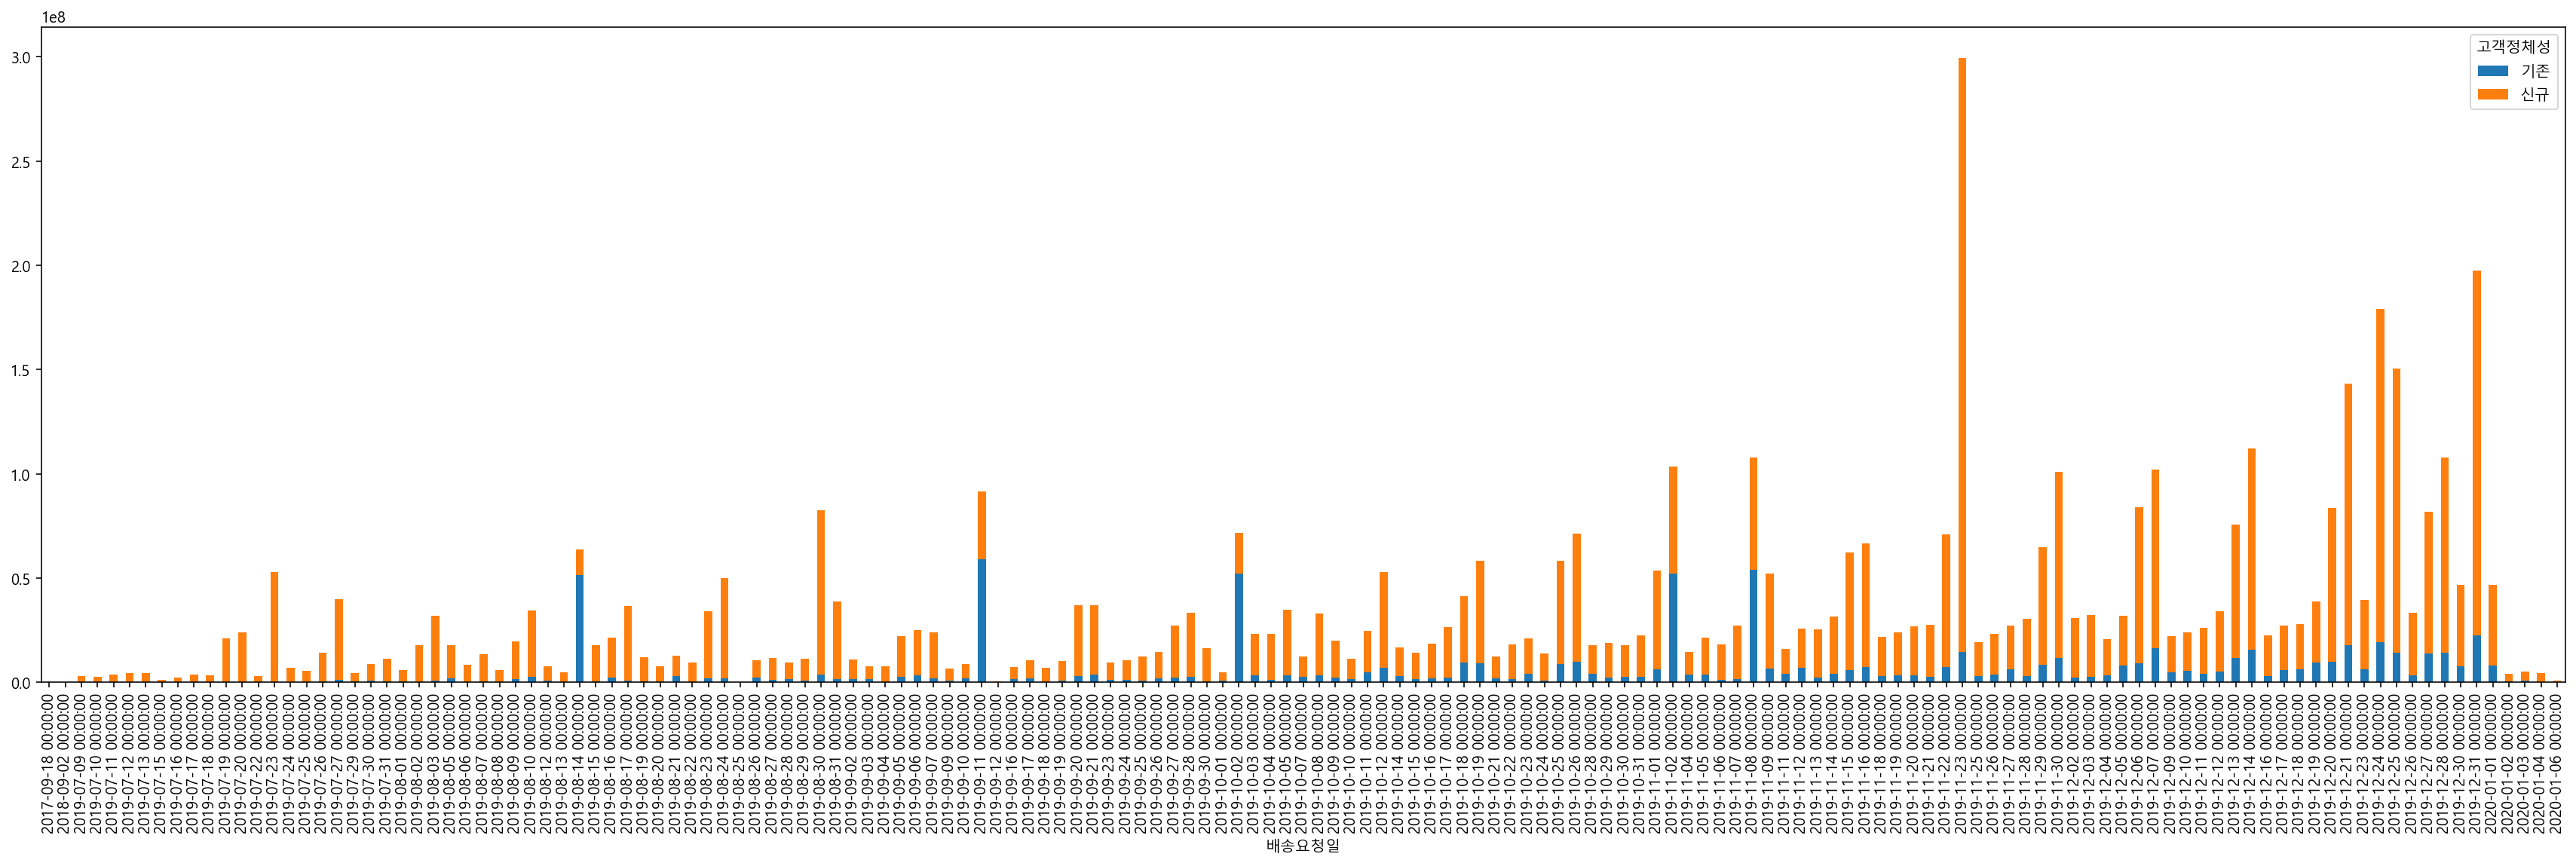

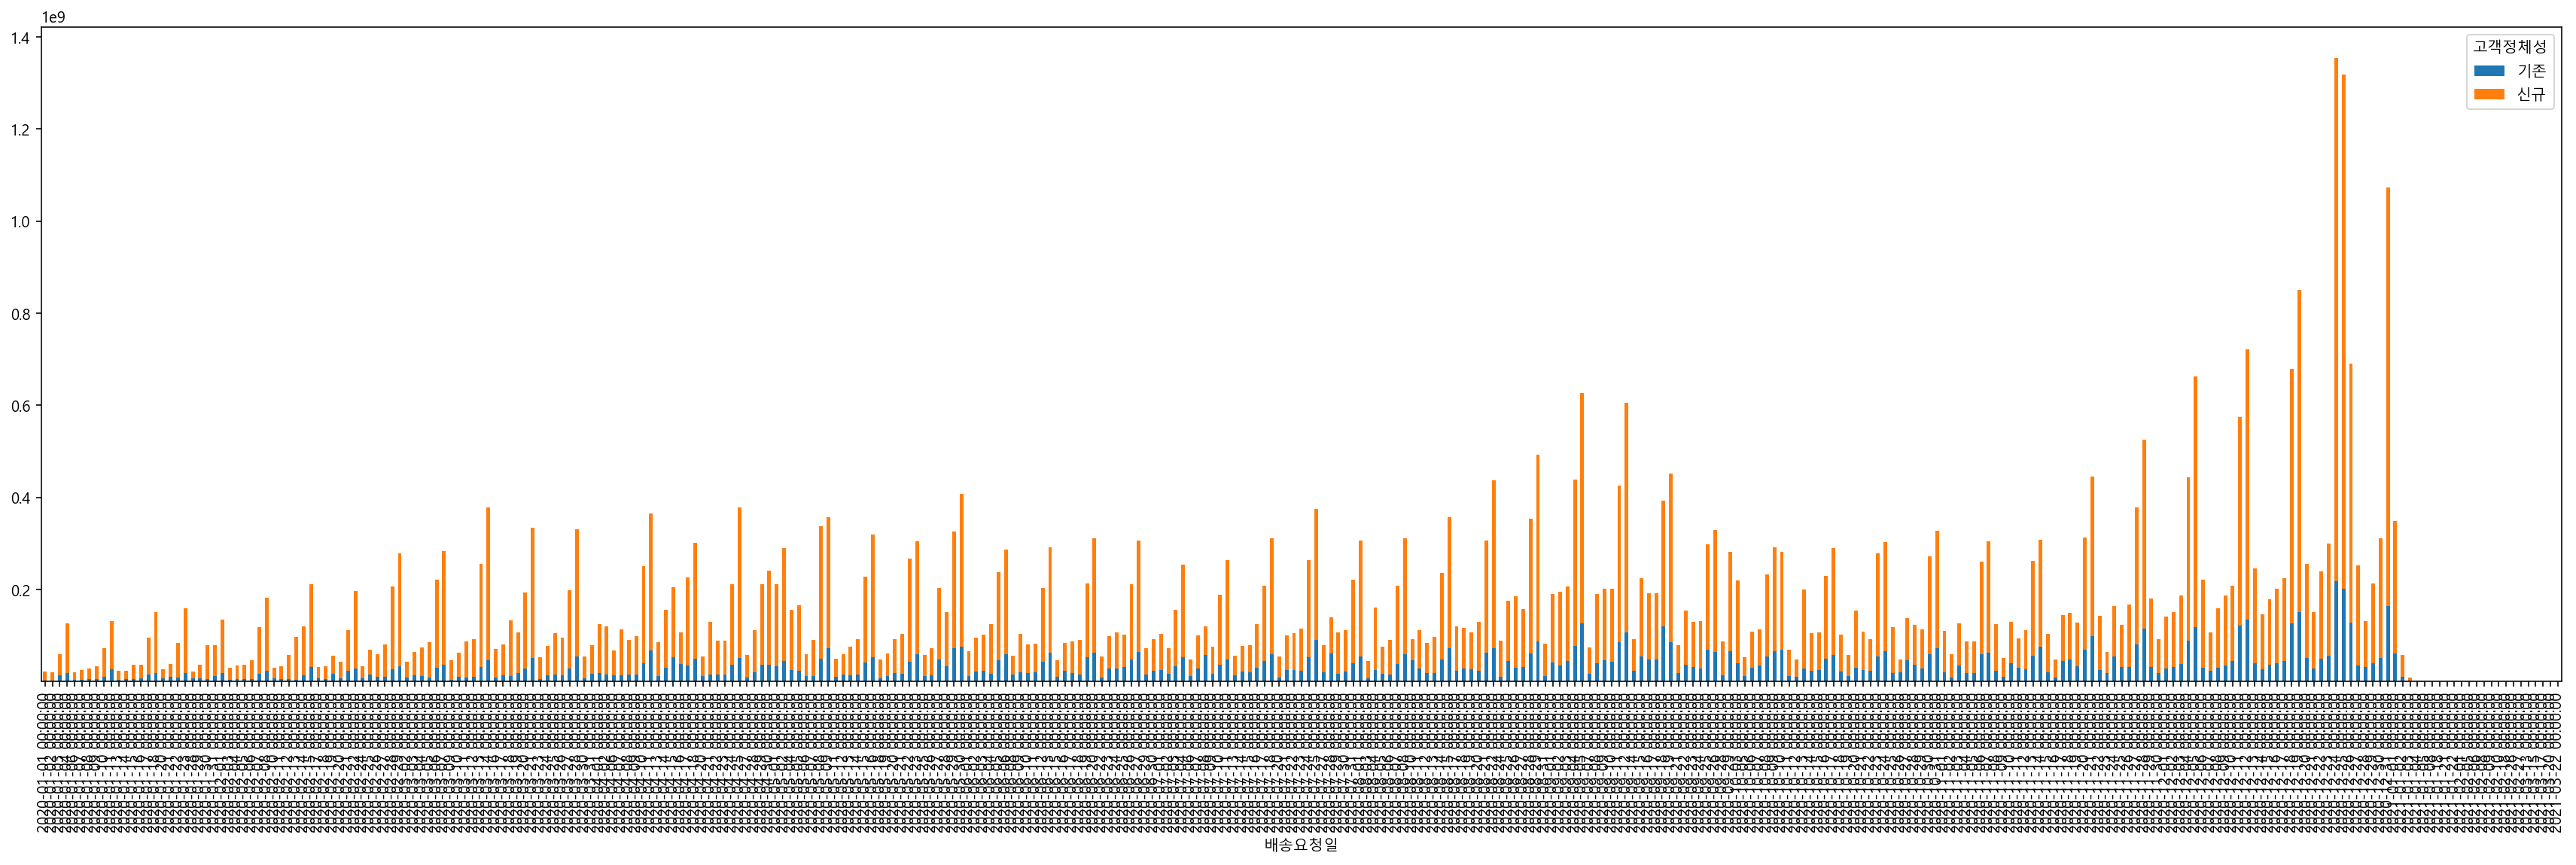

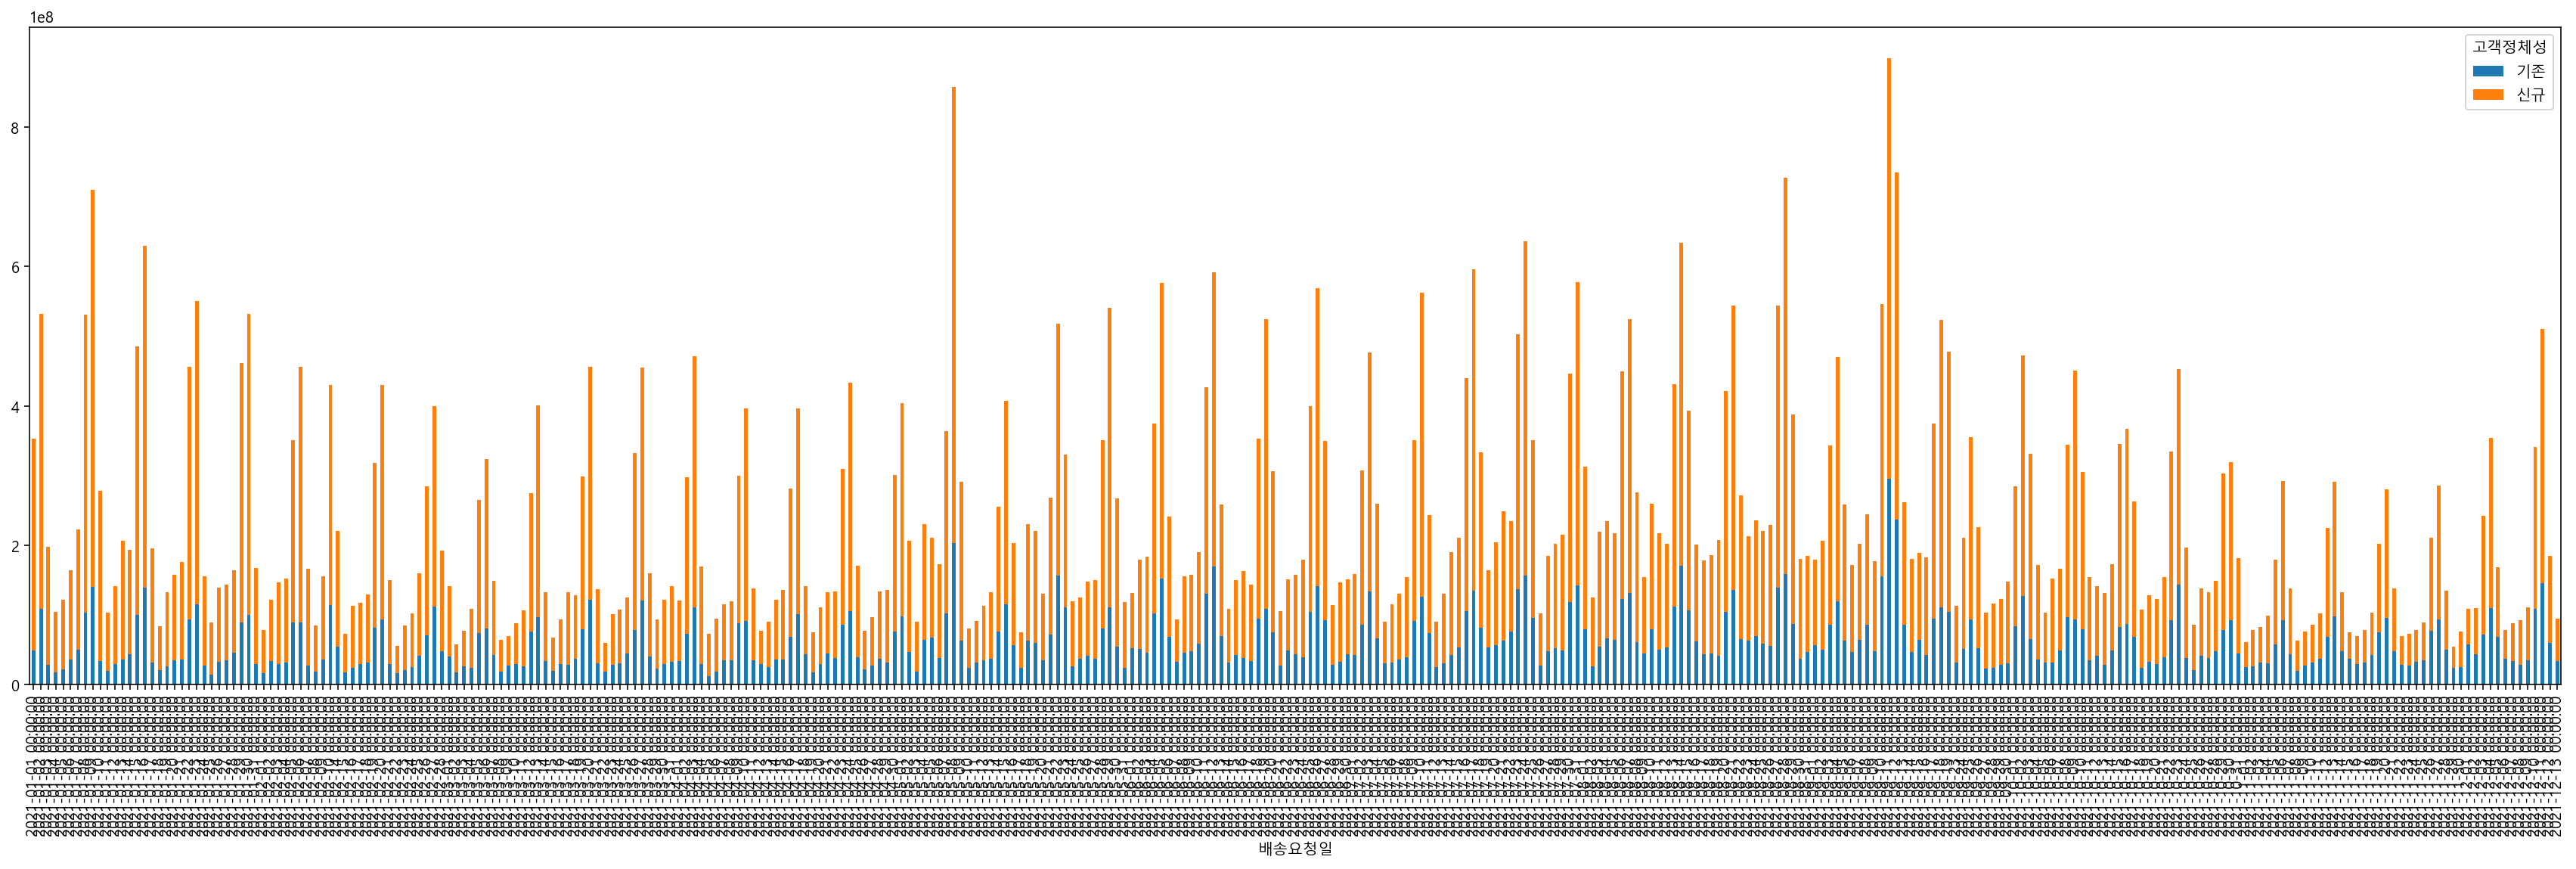

In [36]:
train_2019 = train[train["year"] == 2019]
train_2020 = train[train["year"] == 2020]
train_2021 = train[train["year"] == 2021]


plt.figure(figsize = [20,5])
train_2019.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "bar", stacked = "True", figsize = [30,8])
train_2020.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "bar", stacked = "True", figsize = [30,8])
train_2021.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "bar", stacked = "True", figsize = [30,8])

### 2) 1번의 bar차트를 areaplot으로 - areaplot

<AxesSubplot:xlabel='배송요청일'>

<Figure size 1800x432 with 0 Axes>

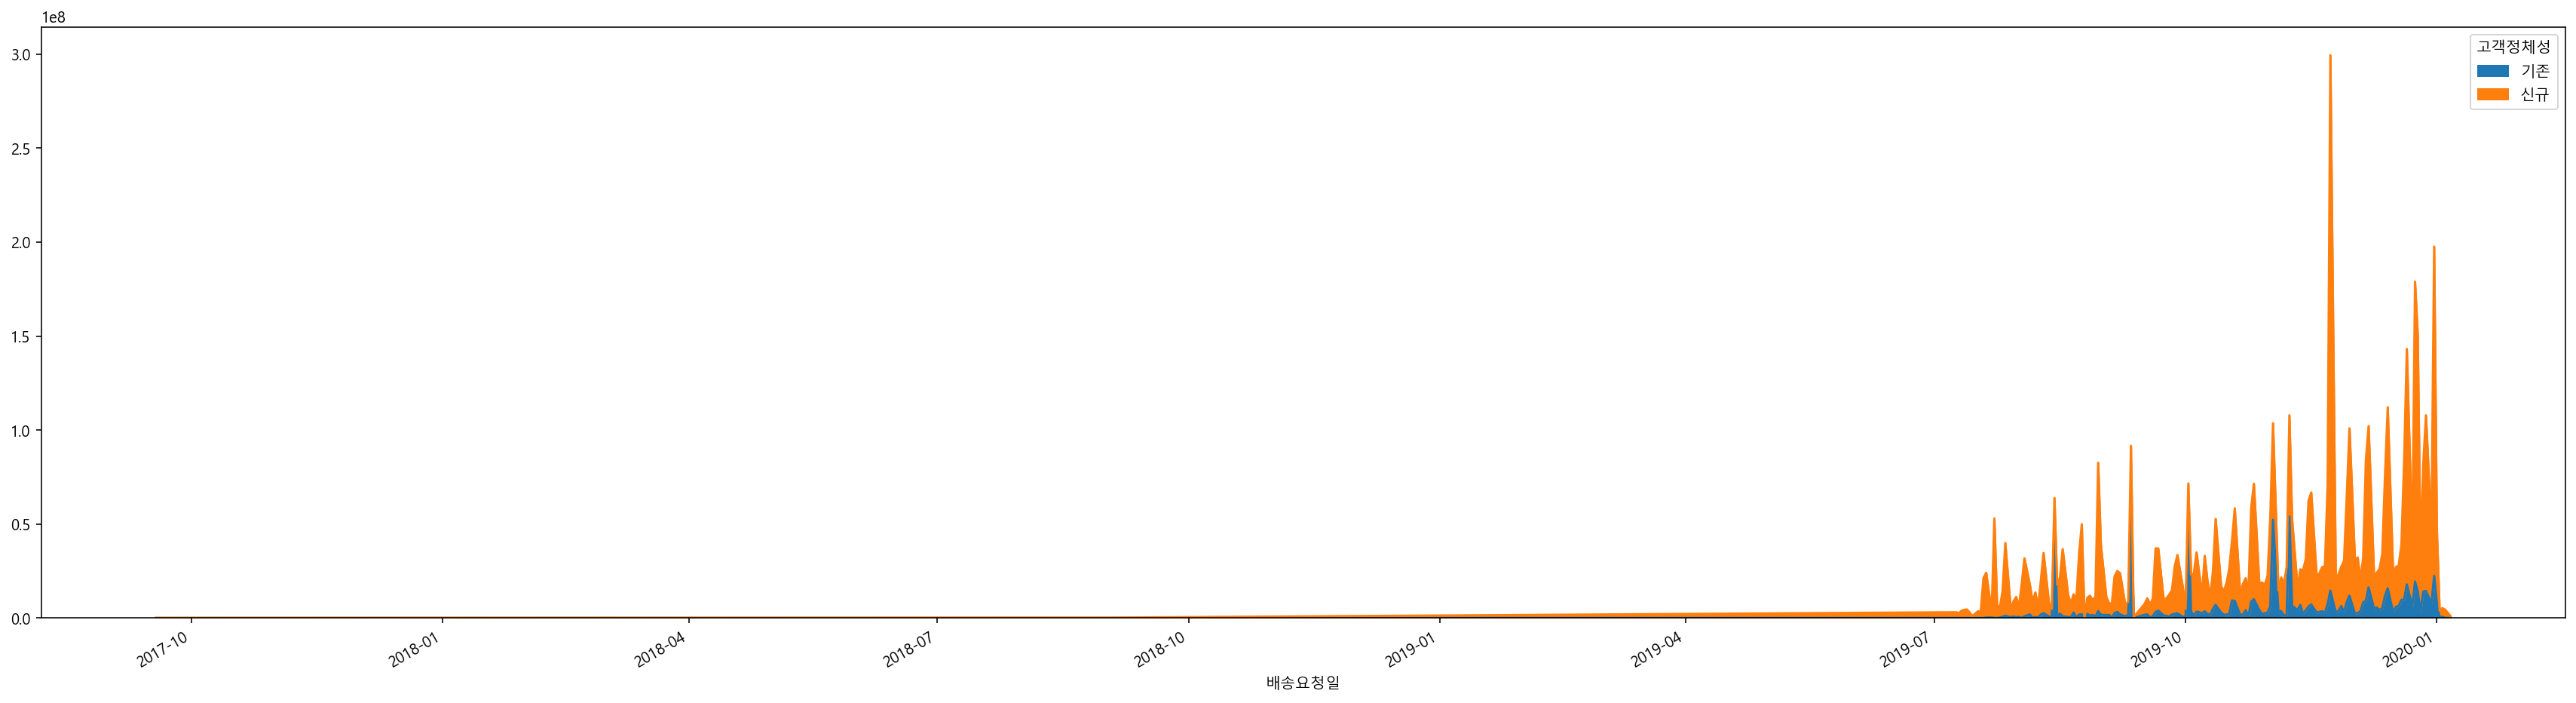

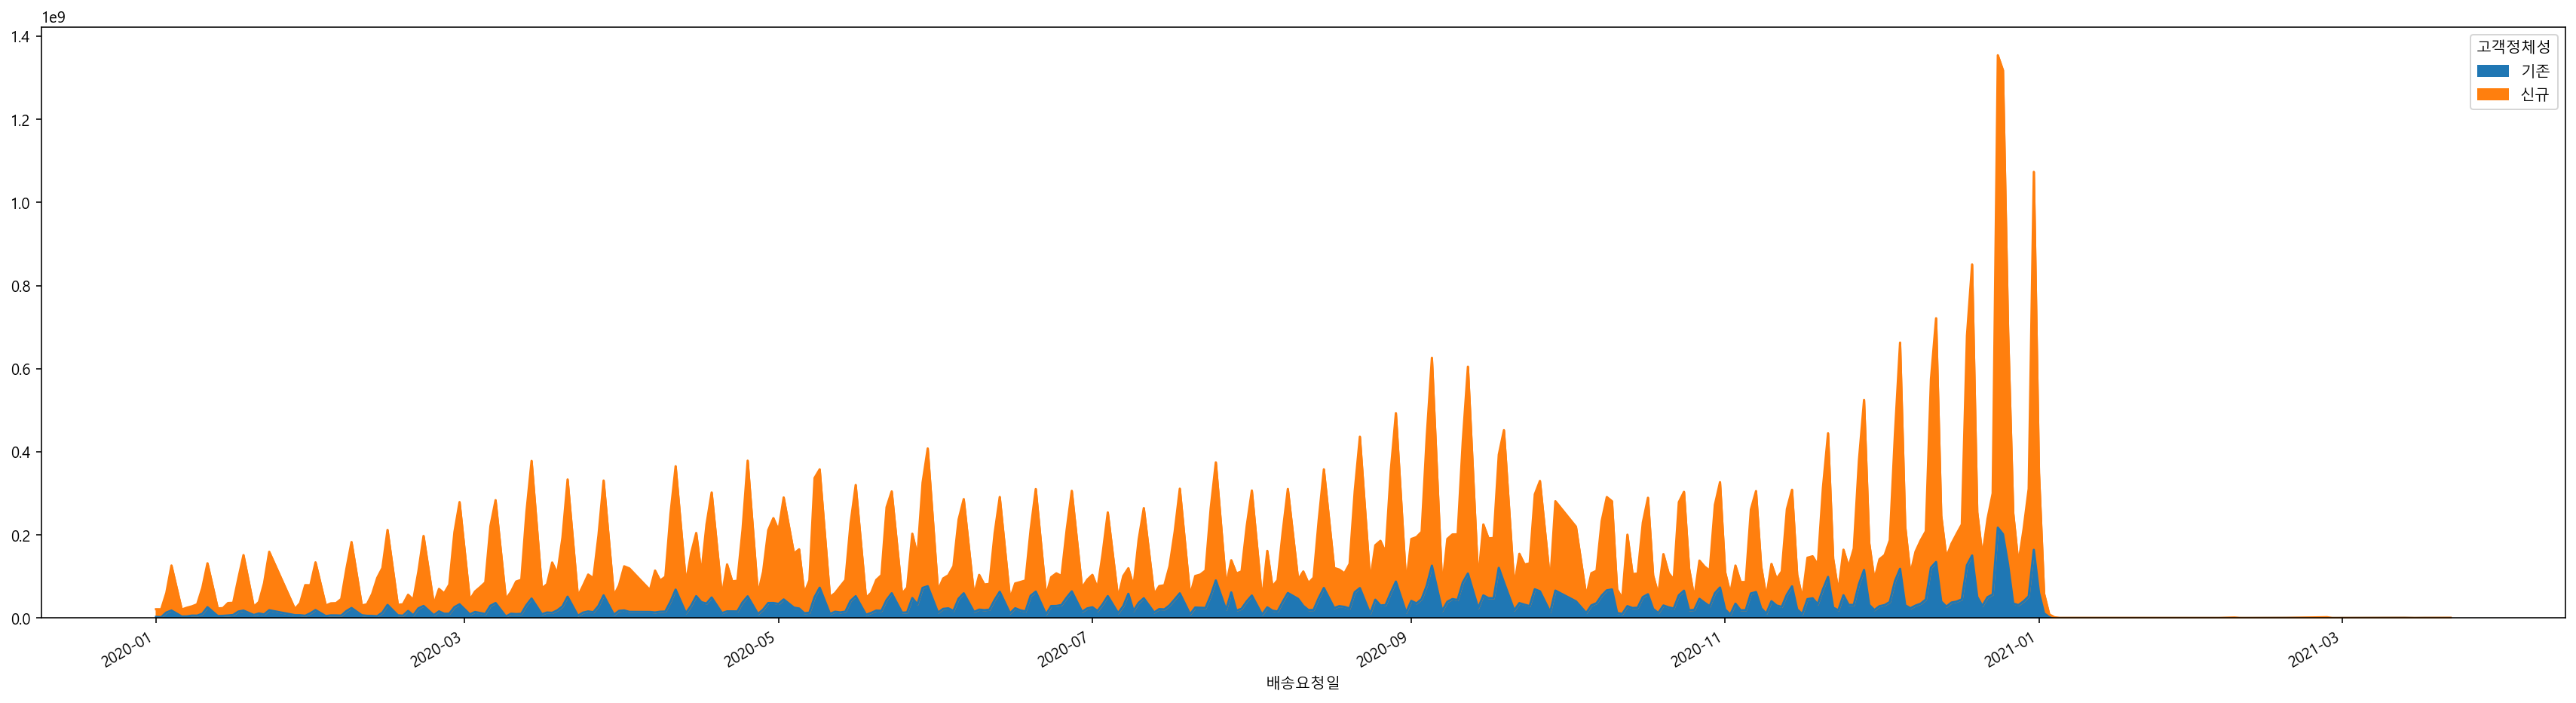

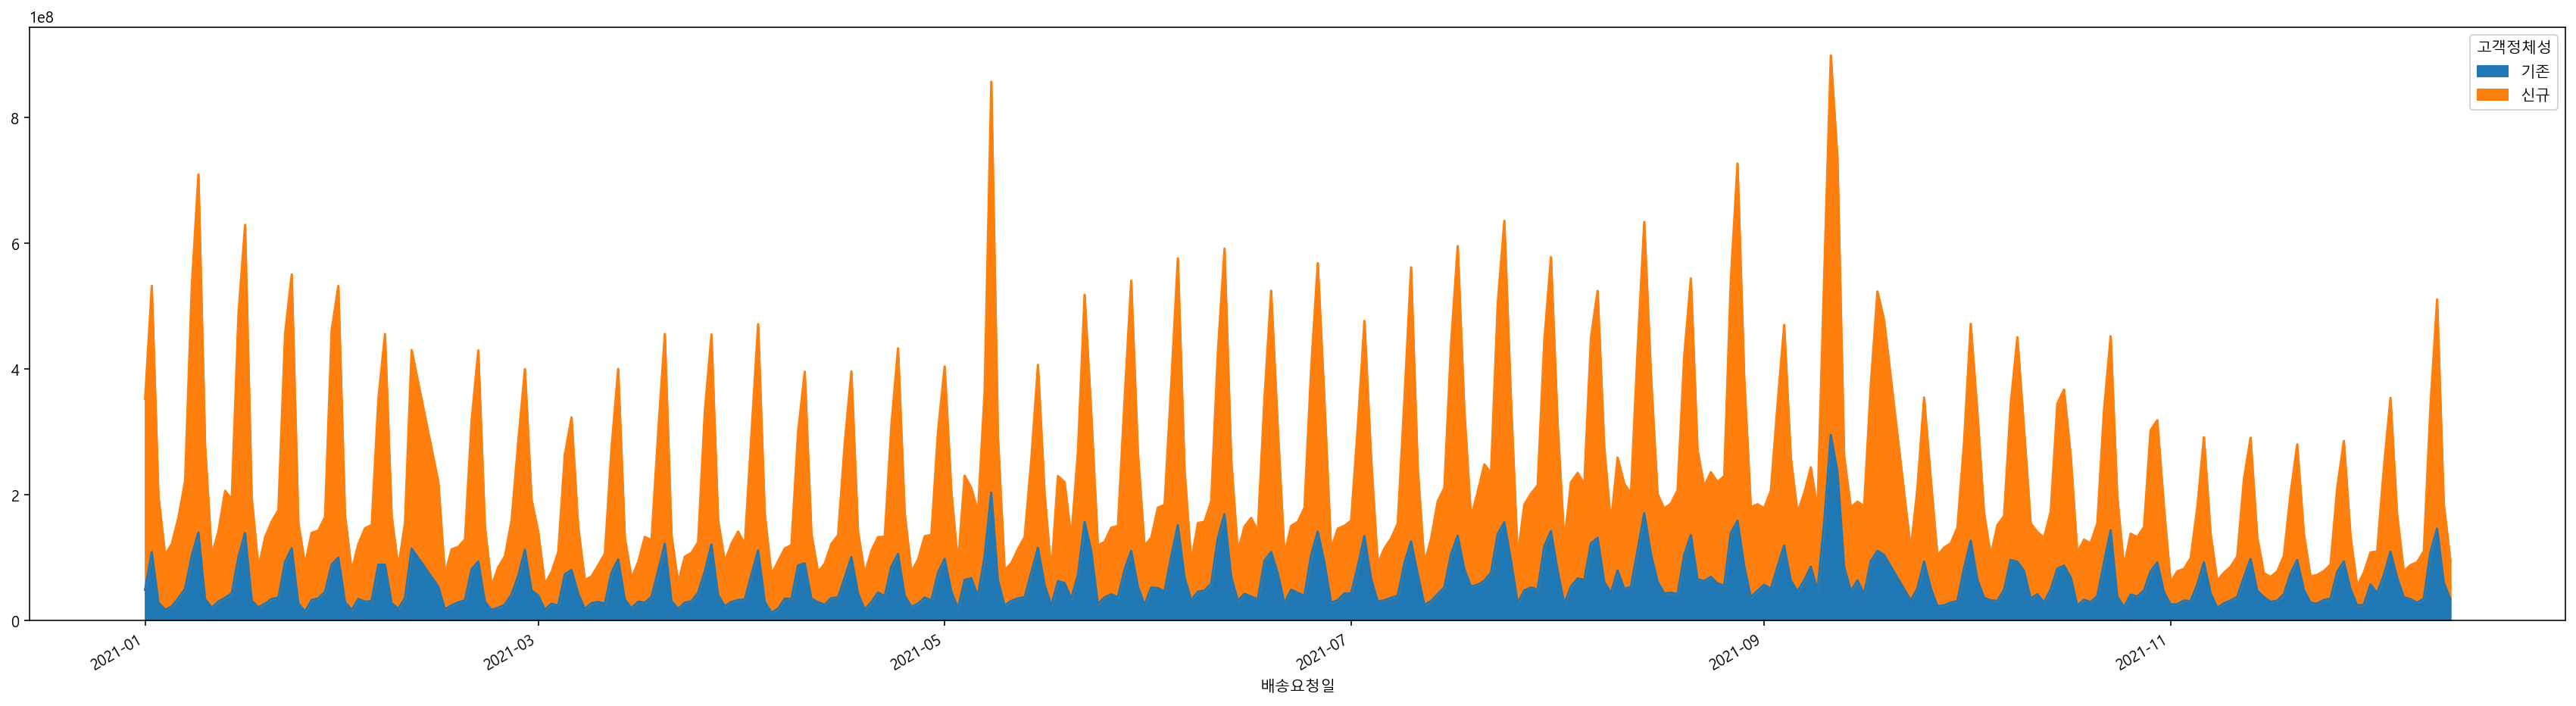

In [35]:
plt.figure(figsize = [25,6])
train_2019.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "area", stacked = "True", figsize = [30,8])
train_2020.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "area", stacked = "True", figsize = [30,8])
train_2021.groupby(["배송요청일","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "area", stacked = "True", figsize = [30,8])

### 3) histplot - 군집

<AxesSubplot:xlabel='총상품금액', ylabel='Density'>

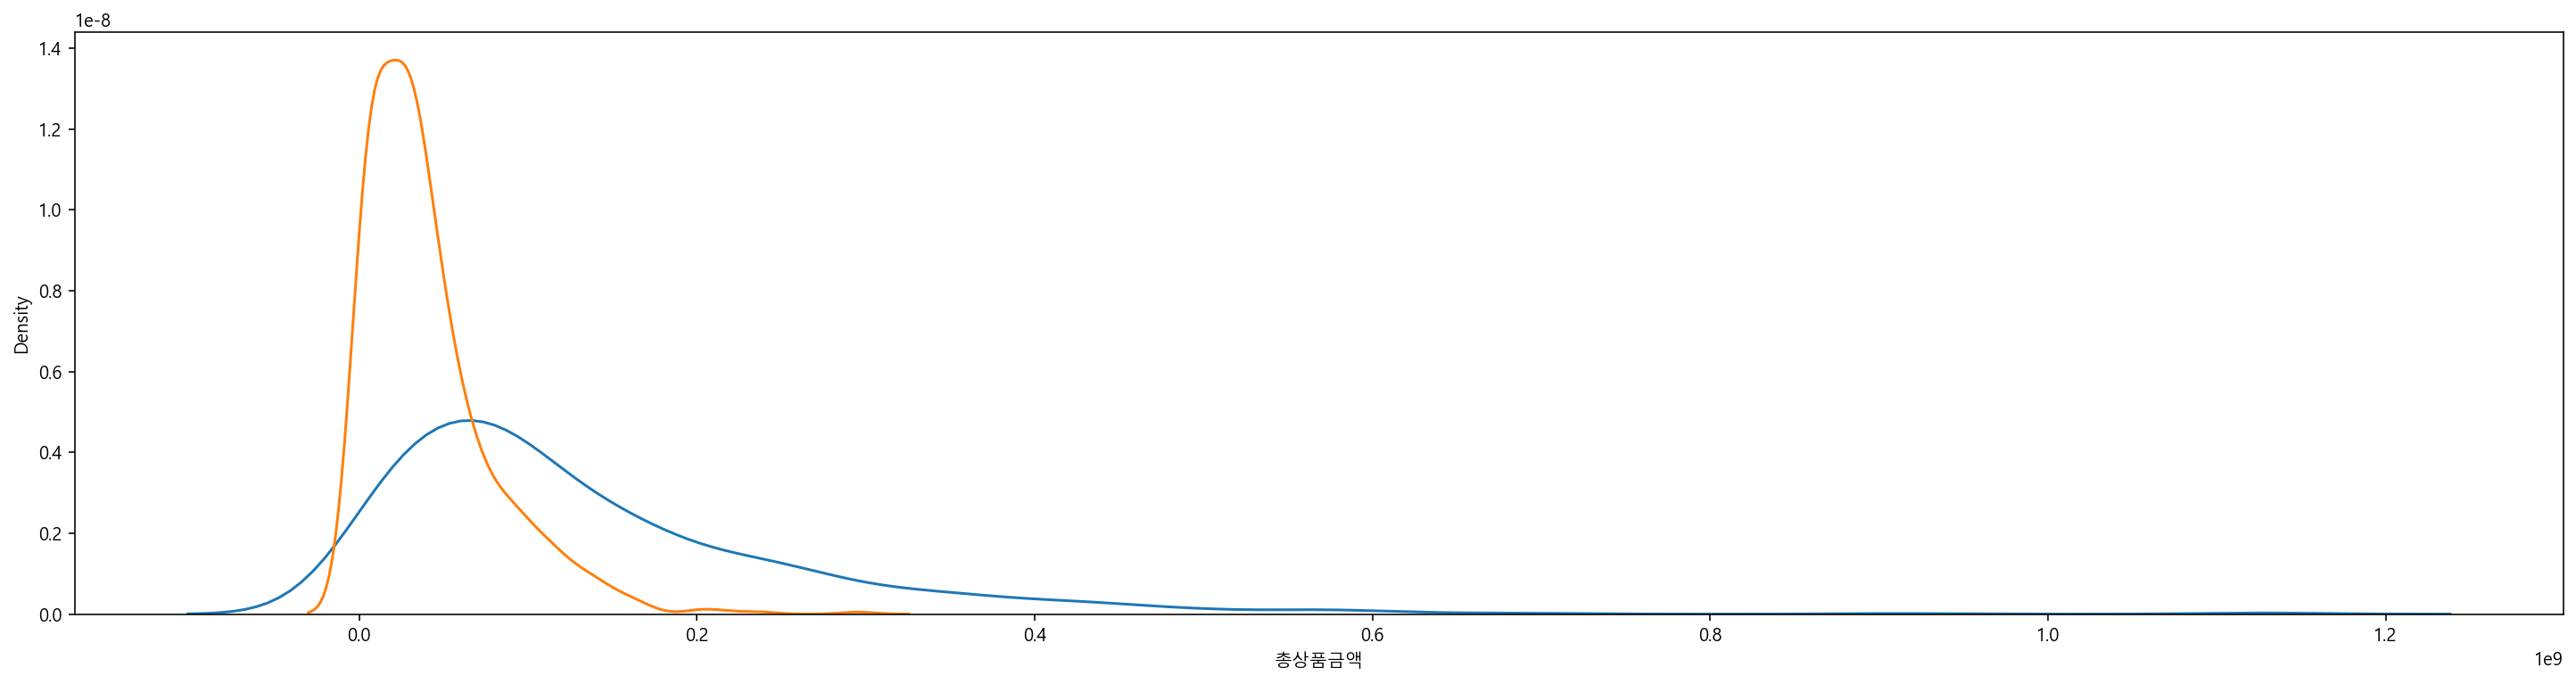

In [64]:
### 엑스 축


train_신규 = train[train["고객정체성"] == "신규"]
train_기존 = train[train["고객정체성"] == "기존"]

plt.figure(figsize = [25,6])
sns.distplot(train_신규.groupby(["배송요청일"])["총상품금액"].sum(), hist = False,label = "신규")
sns.distplot(train_기존.groupby(["배송요청일"])["총상품금액"].sum(), hist = False, label = "기존")

<AxesSubplot:xlabel='총상품금액', ylabel='Density'>

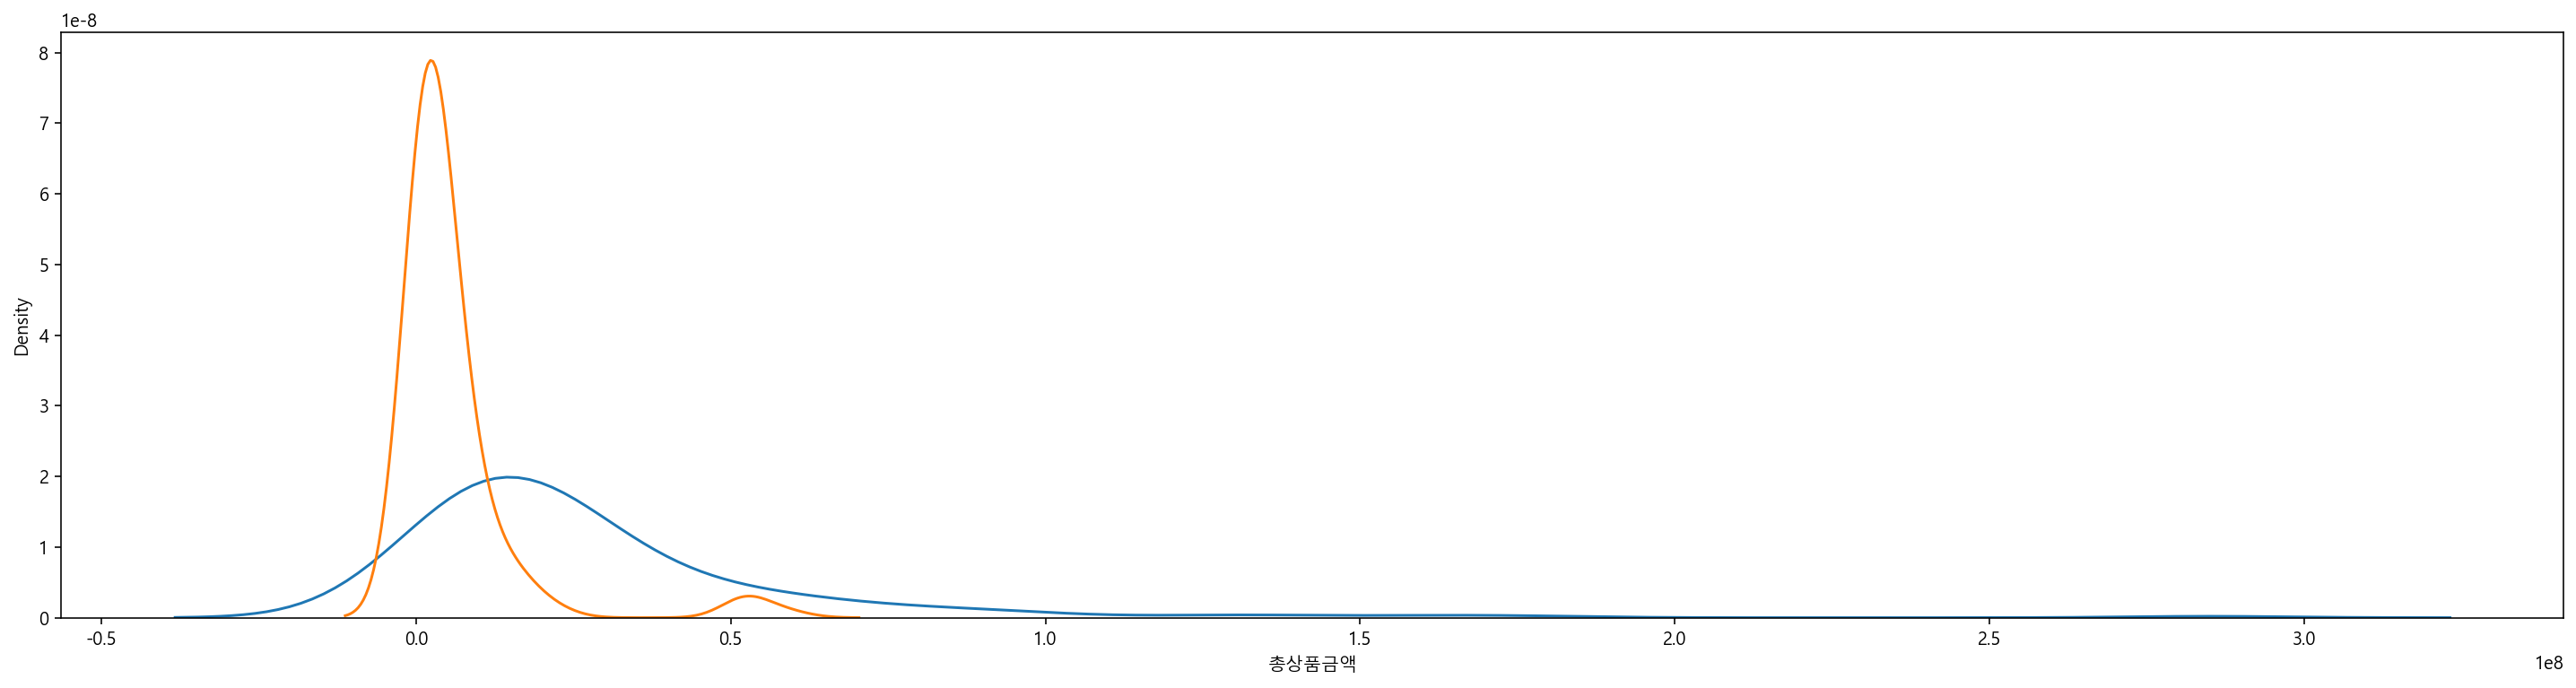

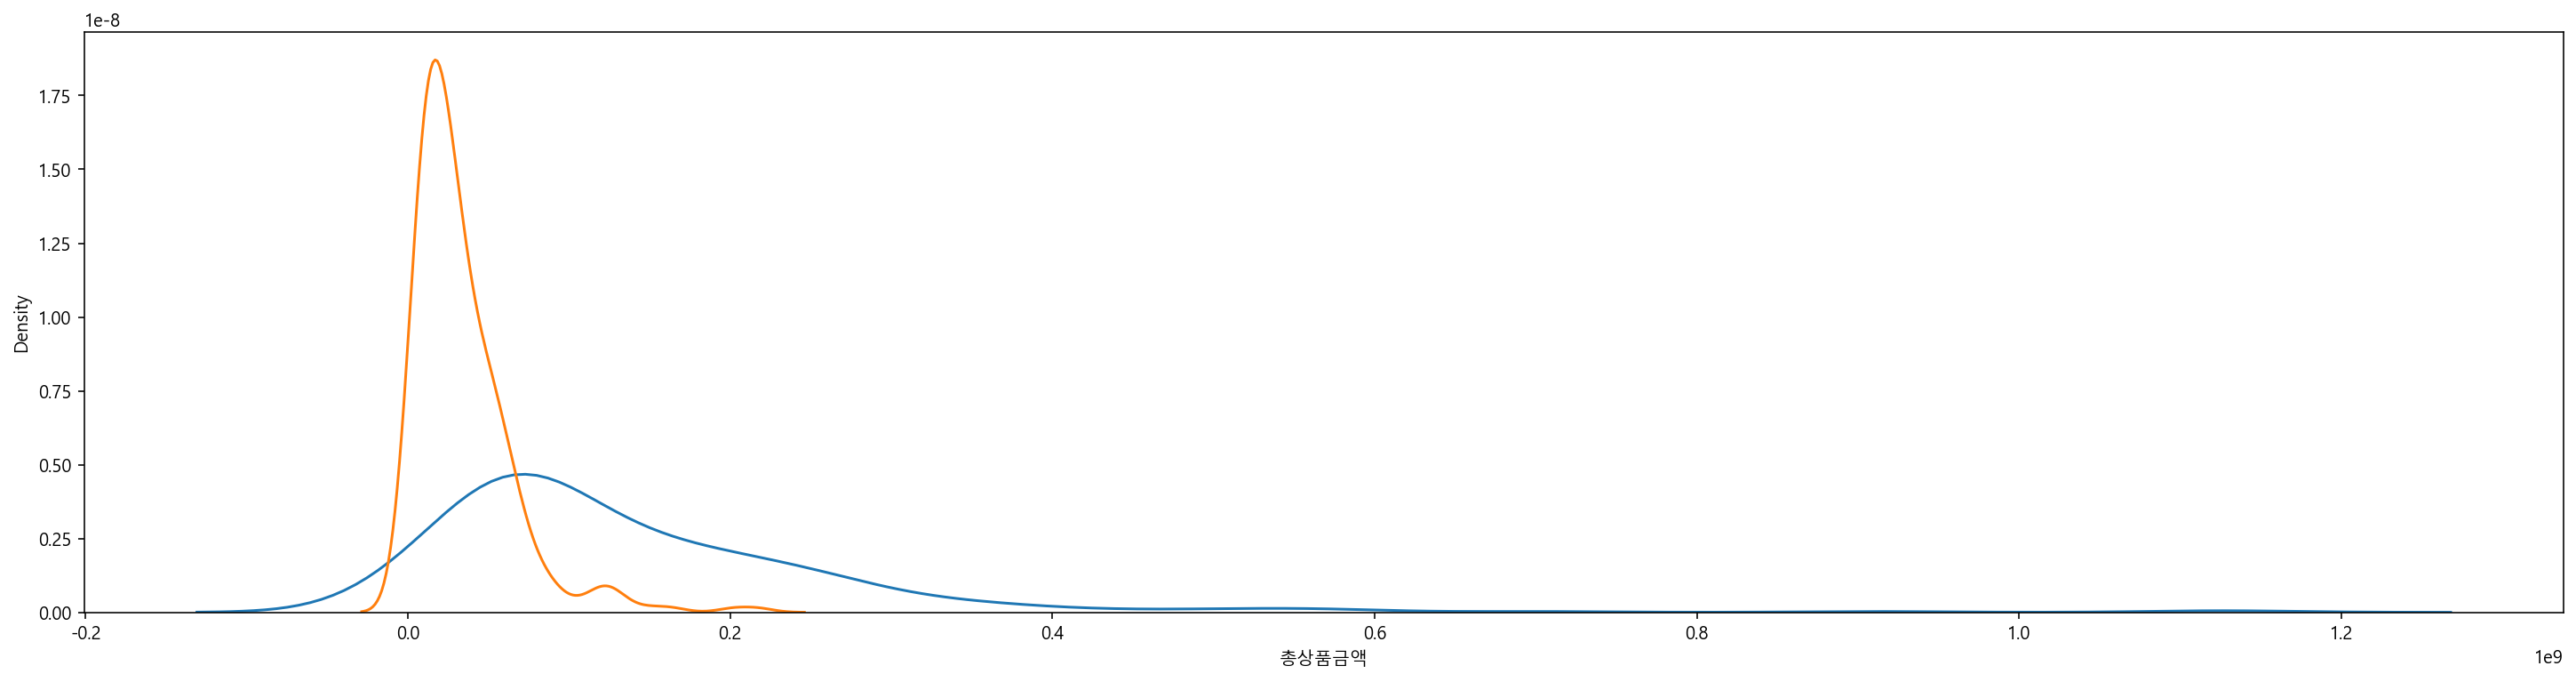

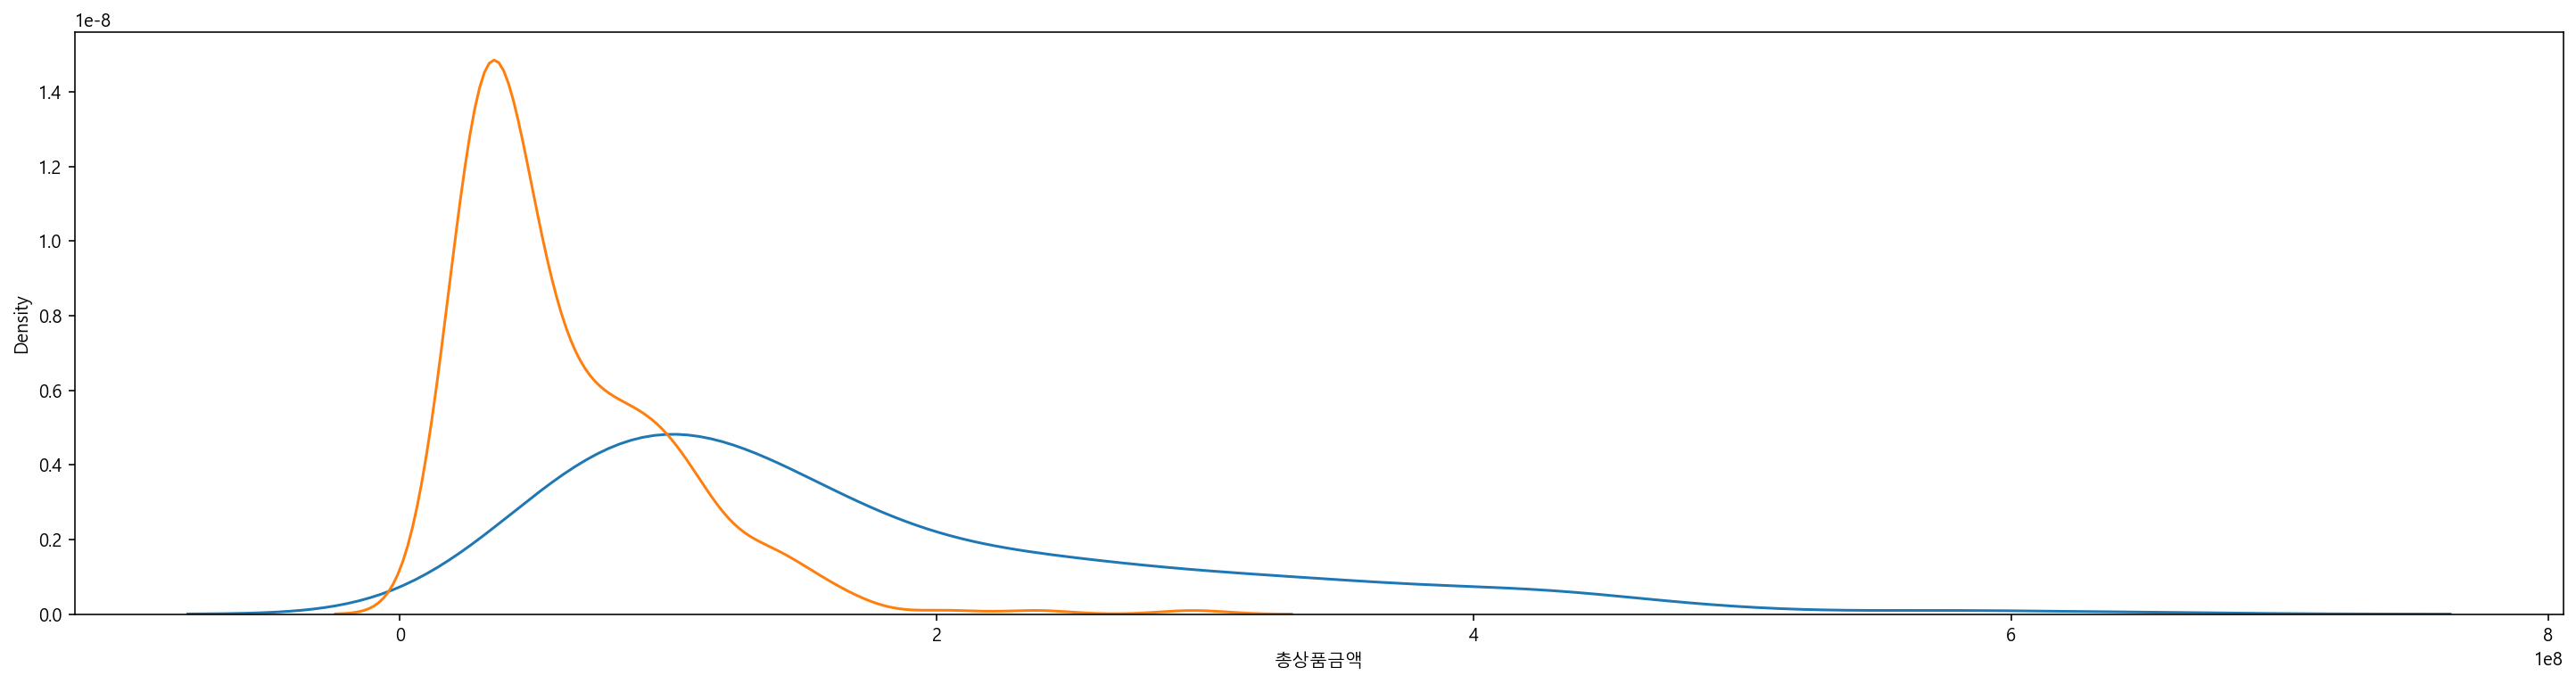

In [77]:
train_2019_신규 = train_2019[train_2019["고객정체성"] == "신규"]
train_2019_기존 = train_2019[train_2019["고객정체성"] == "기존"]

plt.figure(figsize = [25,6])
sns.distplot(train_2019_신규.groupby(["배송요청일"])["총상품금액"].sum(), hist = False,label = "신규")
sns.distplot(train_2019_기존.groupby(["배송요청일"])["총상품금액"].sum(), hist = False, label = "기존")

train_2020_신규 = train_2020[train_2020["고객정체성"] == "신규"]
train_2020_기존 = train_2020[train_2020["고객정체성"] == "기존"]

plt.figure(figsize = [25,6])
sns.distplot(train_2020_신규.groupby(["배송요청일"])["총상품금액"].sum(), hist = False,label = "신규")
sns.distplot(train_2020_기존.groupby(["배송요청일"])["총상품금액"].sum(), hist = False, label = "기존")

train_2021_신규 = train_2021[train_2021["고객정체성"] == "신규"]
train_2021_기존 = train_2021[train_2021["고객정체성"] == "기존"]

plt.figure(figsize = [25,6])
sns.distplot(train_2021_신규.groupby(["배송요청일"])["총상품금액"].sum(), hist = False,label = "신규")
sns.distplot(train_2021_기존.groupby(["배송요청일"])["총상품금액"].sum(), hist = False, label = "기존")

### 4) period - 년,월로 비교 - 가장 괜찮은 그래프

In [107]:
train.head()

,주문번호,주문시간,배송요청일,고객명,이메일,주문 UserID,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액,고객정체성,재구매기간(일),year,month,day_name,day,period
991,_1908056b19,2019-08-05 14:59:35,2019-08-06,이원섭,onesup.lee@gmail.com,1.0,30900.0,3500.0,0,0,3500.0,신규,NaN,2019,8,5,Monday,2019-08
25841,_201907091304f377c6,2019-07-09 13:04:05,2019-07-09,이원섭,onesup.lee@gmail.com,6.0,280800.0,21000.0,0,0,21000.0,신규,NaN,2019,7,9,Tuesday,2019-07
26584,_201907301343203398,2019-07-30 13:43:11,2019-07-30,최형석,hs.choi@onul-hoi.com,10.0,19900.0,3500.0,0,0,20400.0,신규,NaN,2019,7,30,Tuesday,2019-07
308891,_nXHz210623115241,2021-06-23 11:52:41,2021-06-25,최형석,hs.choi@onul-hoi.com,10.0,29900.0,3500.0,0,10000,23400.0,기존,693.923264,2021,6,23,Wednesday,2021-06
3037,_190906bff1,2019-09-06 10:32:40,2019-09-06,김재현,vici07@naver.com,12.0,49900.0,3500.0,33000,0,20400.0,신규,NaN,2019,9,6,Friday,2019-09


<AxesSubplot:xlabel='period'>

<Figure size 1800x432 with 0 Axes>

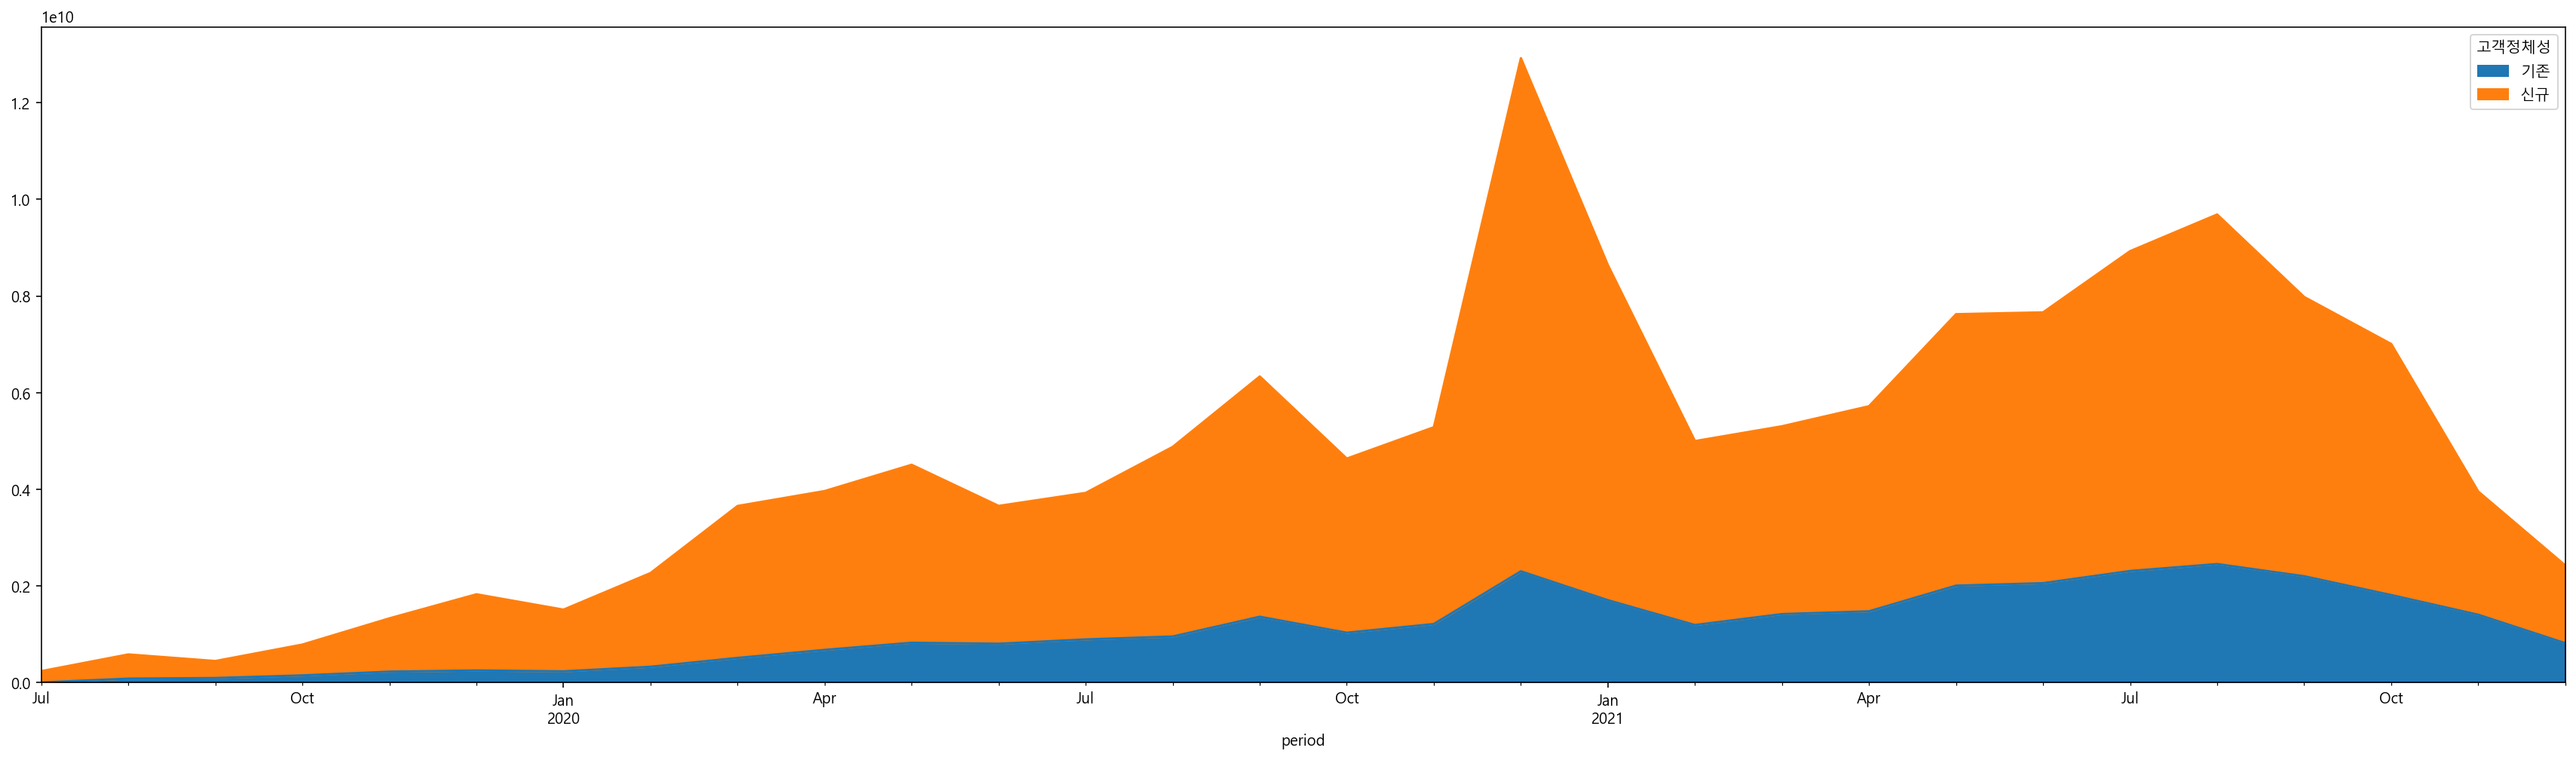

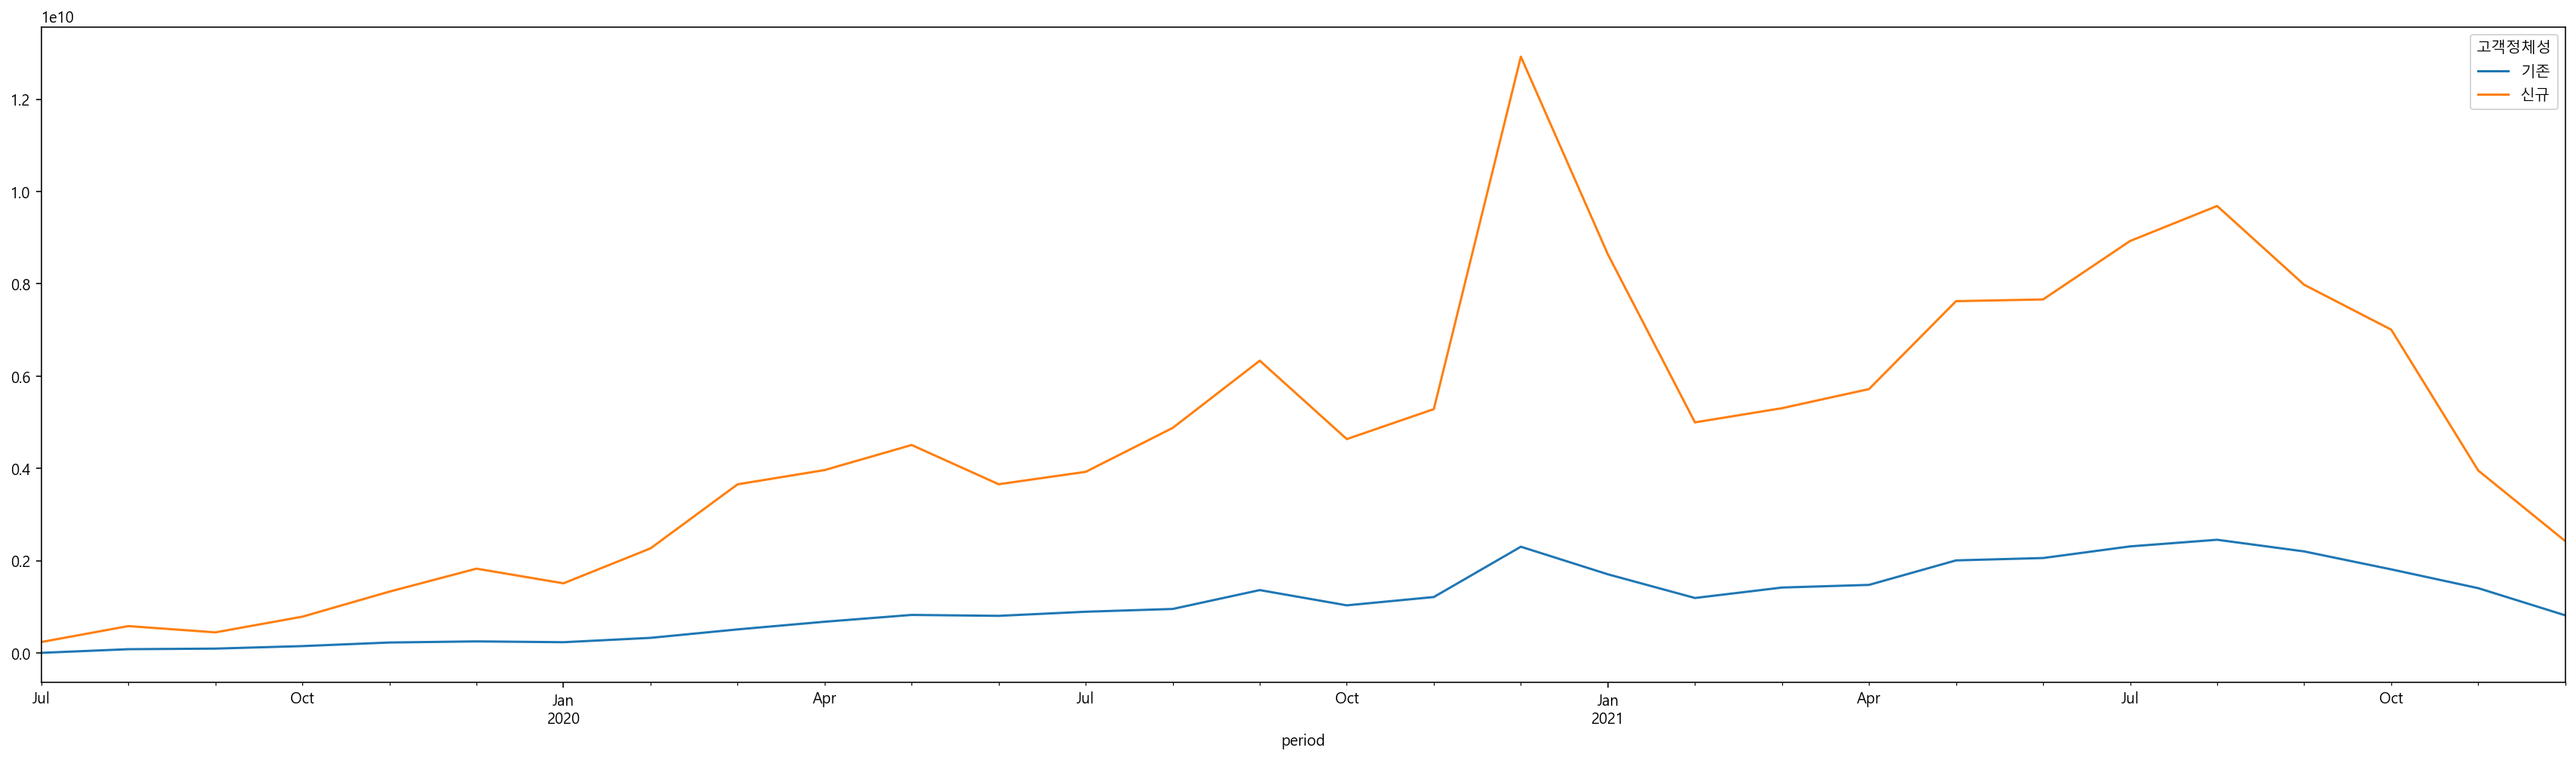

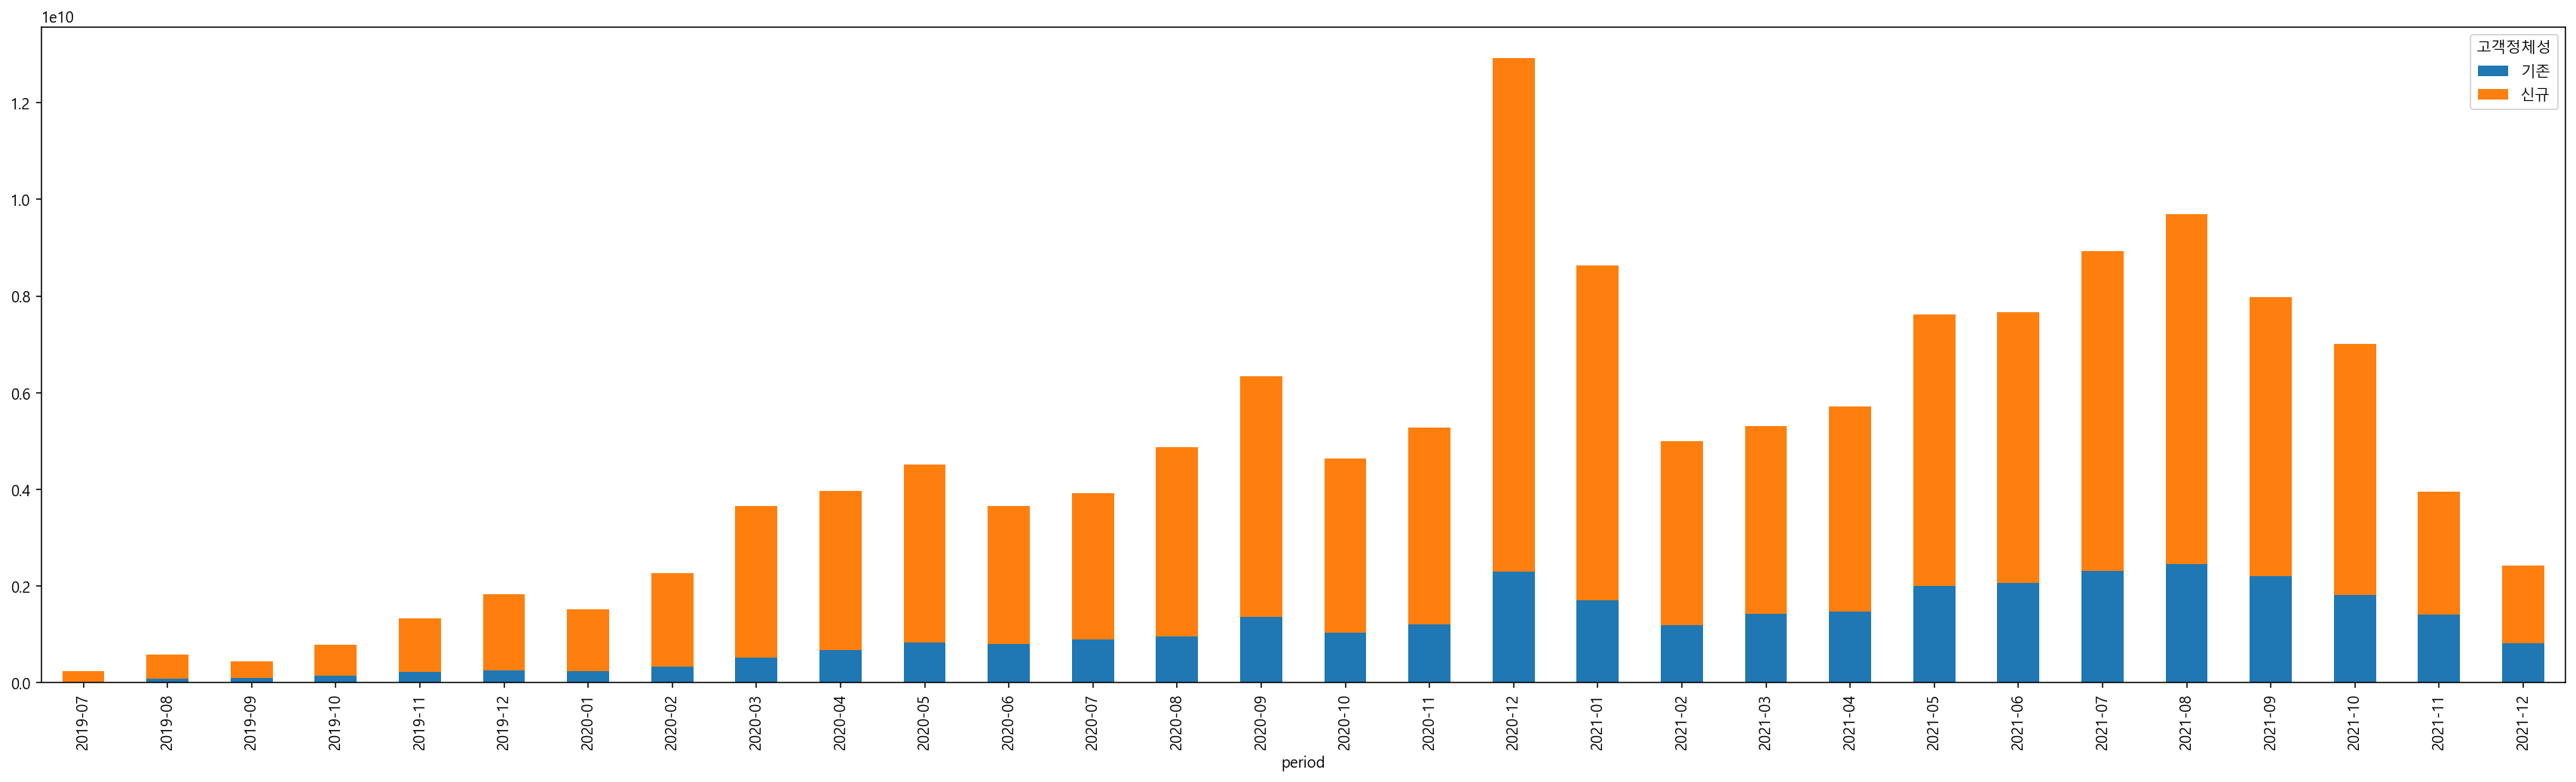

In [94]:
plt.figure(figsize = [25,6])
train.groupby(["period","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "area", stacked = "True", figsize = [30,8])
# train.groupby(["period","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "line", stacked = "True", figsize = [30,8])
# train.groupby(["period","고객정체성"])["총상품금액"].sum().unstack().plot(kind = "bar", stacked = "True", figsize = [30,8])

In [ ]:
### 재구매기간은 1일 이하는 제거한다 - 같은날 두번 구매한건 취급하지 않기로 함 

#### 대략 60일 기준으로 분배한 결과

[  0.          61.359938   122.71987599 184.07981399 245.43975198
 306.79968998 368.15962798 429.51956597 490.87950397 552.23944196
 613.59937996 674.95931796 736.31925595 797.67919395 859.03913194]


1     0.449476
2     0.187137
3     0.117769
4     0.086234
5     0.058428
6     0.041615
7     0.024593
8     0.015948
9     0.009185
10    0.005258
11    0.002760
12    0.001139
13    0.000325
14    0.000134
Name: 재구매기간(일)_step, dtype: float64

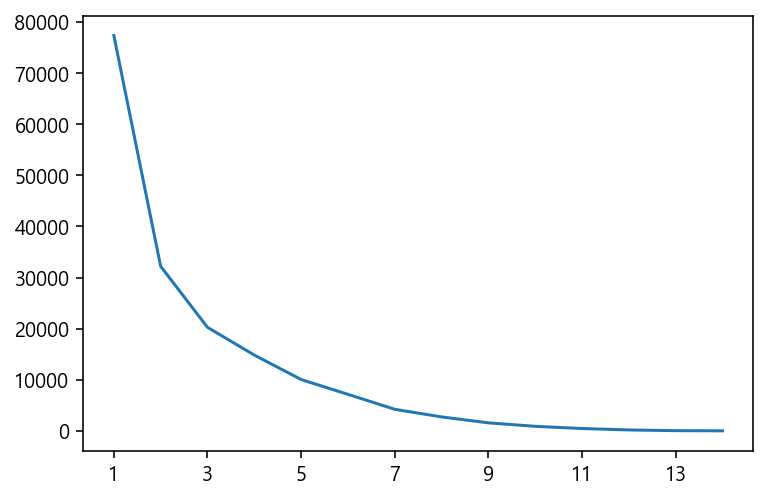

In [168]:
train_copy = train.copy()

bins = np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 15)
group_name = ['1','2', '3','4','5', '6','7','8', '9','10','11', '12','13','14']

train_copy["재구매기간(일)_step"] = pd.cut(train_copy["재구매기간(일)"], bins, labels = group_name)

print(np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 15))
train_copy["재구매기간(일)_step"].value_counts().plot()
train_copy["재구매기간(일)_step"].value_counts(normalize = True)

#### 대략 45일 기준으로한 결과

[  0.          45.21258589  90.42517178 135.63775768 180.85034357
 226.06292946 271.27551535 316.48810124 361.70068713 406.91327303
 452.12585892 497.33844481 542.5510307  587.76361659 632.97620249
 678.18878838 723.40137427 768.61396016 813.82654605 859.03913194]


1     0.380718
2     0.168686
3     0.116996
4     0.081778
5     0.068026
6     0.052061
7     0.038426
8     0.030292
9     0.020561
10    0.014559
11    0.010202
12    0.006977
13    0.004503
14    0.003102
15    0.001586
16    0.000970
17    0.000296
18    0.000192
19    0.000070
Name: 재구매기간(일)_step, dtype: float64

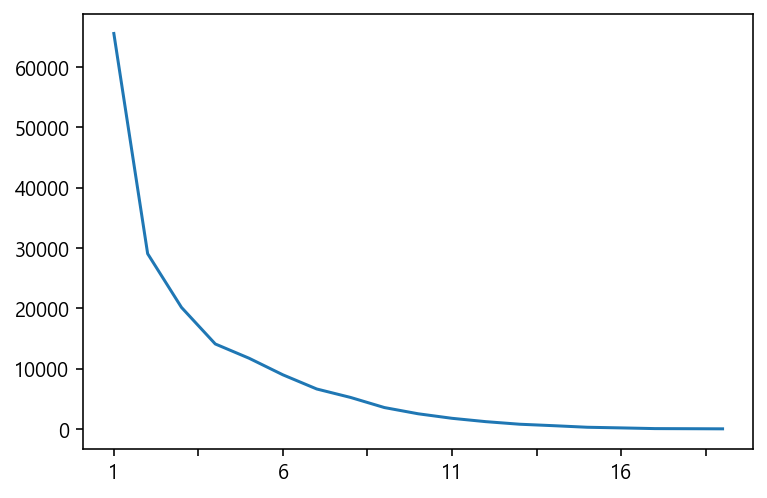

In [169]:
train_copy = train.copy()

bins = np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 20)
group_name = ['1','2', '3','4','5', '6','7','8', '9','10','11', '12','13','14','15','16', '17','18','19']

train_copy["재구매기간(일)_step"] = pd.cut(train_copy["재구매기간(일)"], bins, labels = group_name)

print(np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 20))
train_copy["재구매기간(일)_step"].value_counts().plot()
train_copy["재구매기간(일)_step"].value_counts(normalize = True)

#### 대략 30일 기준으로 한 결과

[  0.          30.679969    61.359938    92.03990699 122.71987599
 153.39984499 184.07981399 214.75978299 245.43975198 276.11972098
 306.79968998 337.47965898 368.15962798 398.83959697 429.51956597
 460.19953497 490.87950397 521.55947297 552.23944196 582.91941096
 613.59937996 644.27934896 674.95931796 705.63928695 736.31925595
 766.99922495 797.67919395 828.35916295 859.03913194]


1     0.298998
2     0.150478
3     0.106649
4     0.080488
5     0.064738
6     0.053031
7     0.043527
8     0.042707
9     0.032267
10    0.026161
11    0.022896
12    0.018719
13    0.013775
14    0.010818
15    0.009028
16    0.006919
17    0.005252
18    0.003933
19    0.003004
20    0.002254
21    0.001708
22    0.001052
23    0.000668
24    0.000471
25    0.000198
26    0.000128
27    0.000087
28    0.000046
Name: 재구매기간(일)_step, dtype: float64

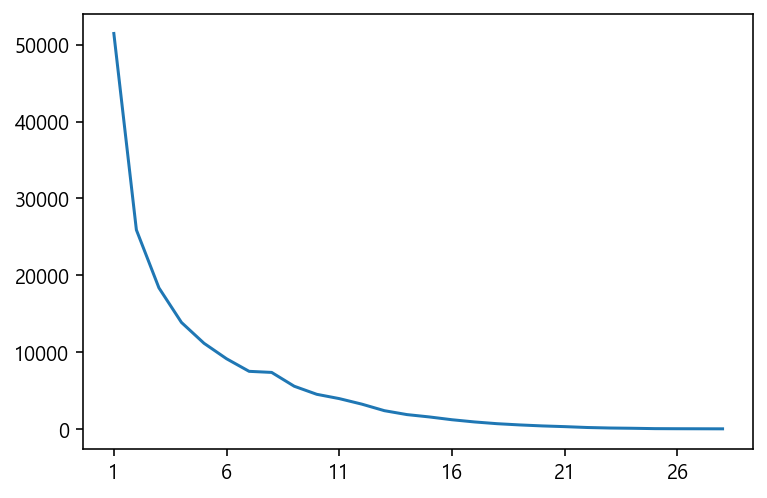

In [170]:
train_copy = train.copy()

bins = np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 29)
group_name = ['1','2', '3','4','5', '6','7','8', '9','10','11', '12','13','14','15','16', '17','18','19','20','21','22','23','24', '25','26','27', '28']

train_copy["재구매기간(일)_step"] = pd.cut(train_copy["재구매기간(일)"], bins, labels = group_name)

print(np.linspace(train_copy["재구매기간(일)"].min(), train_copy["재구매기간(일)"].max(), 29))
train_copy["재구매기간(일)_step"].value_counts().plot()
train_copy["재구매기간(일)_step"].value_counts(normalize = True)

월별 기존 신규 구했던 데이터를 활용해서 

1. 코호트별 월 누적금액을 구한다 - 

가입자 데이터를 받아서 - 위에 붙인다

년도별로 나눈뒤에 월별로 다시 데이터를 쪼갠다




두번째는

1. 신규고객의 가입일 데이터를 확보해서 붙이고  / 2. 그 달의 '신규고객이 일으킨 매출(무조건 그 달에 첫구매를 한 사람임)'을 그래프로 만들고 + 여기서 매출을 일으킨 사람들의 '첫구매일자 - 가입일자' 시간을 구해서 평균을 낸다 


In [14]:
ID_Data = pd.read_csv("Downloads/개인회원여부들.csv")
print(ID_Data.shape)
ID_Data.columns = ['주문 UserID', '가입경로', '가입시간']
ID_Data.head()

(525463, 3)


,주문 UserID,가입경로,가입시간
0,1,이메일,2019-05-15 19:53:12
1,2,이메일,2019-05-24 14:46:36
2,3,이메일,2019-05-27 15:42:17
3,4,이메일,2019-05-31 17:15:31
4,5,이메일,2019-05-31 17:17:54


In [15]:
train = pd.merge(train, ID_Data, how = "left", on = "주문 UserID")

train["가입시간"] = pd.to_datetime(train["가입시간"])

train["가입시간_year"] = train["가입시간"].dt.year
train["가입시간_month"] = train["가입시간"].dt.month
train["가입시간_day_name"] = train["가입시간"].dt.day
train["가입시간_day"] = train["가입시간"].dt.day_name()
train["가입시간_period"] = train["가입시간"].dt.to_period(freq = "M")

### 신규고객의 가입일 데이터를 확보해서 붙이고 / 2. 그 달의 '신규고객이 일으킨 매출(무조건 그 달에 첫구매를 한 사람임)'을 그래프로 만들고 + 여기서 매출을 일으킨 사람들의 '첫구매일자 - 가입일자' 시간을 구해서 평균을 낸다

#### 1. 신규고객 매출 - 신규고객의 매출이 애시당초 크기 때문에 이 그래프로는 의미있는 수치 발견 못함

<AxesSubplot:xlabel='가입시간_period'>

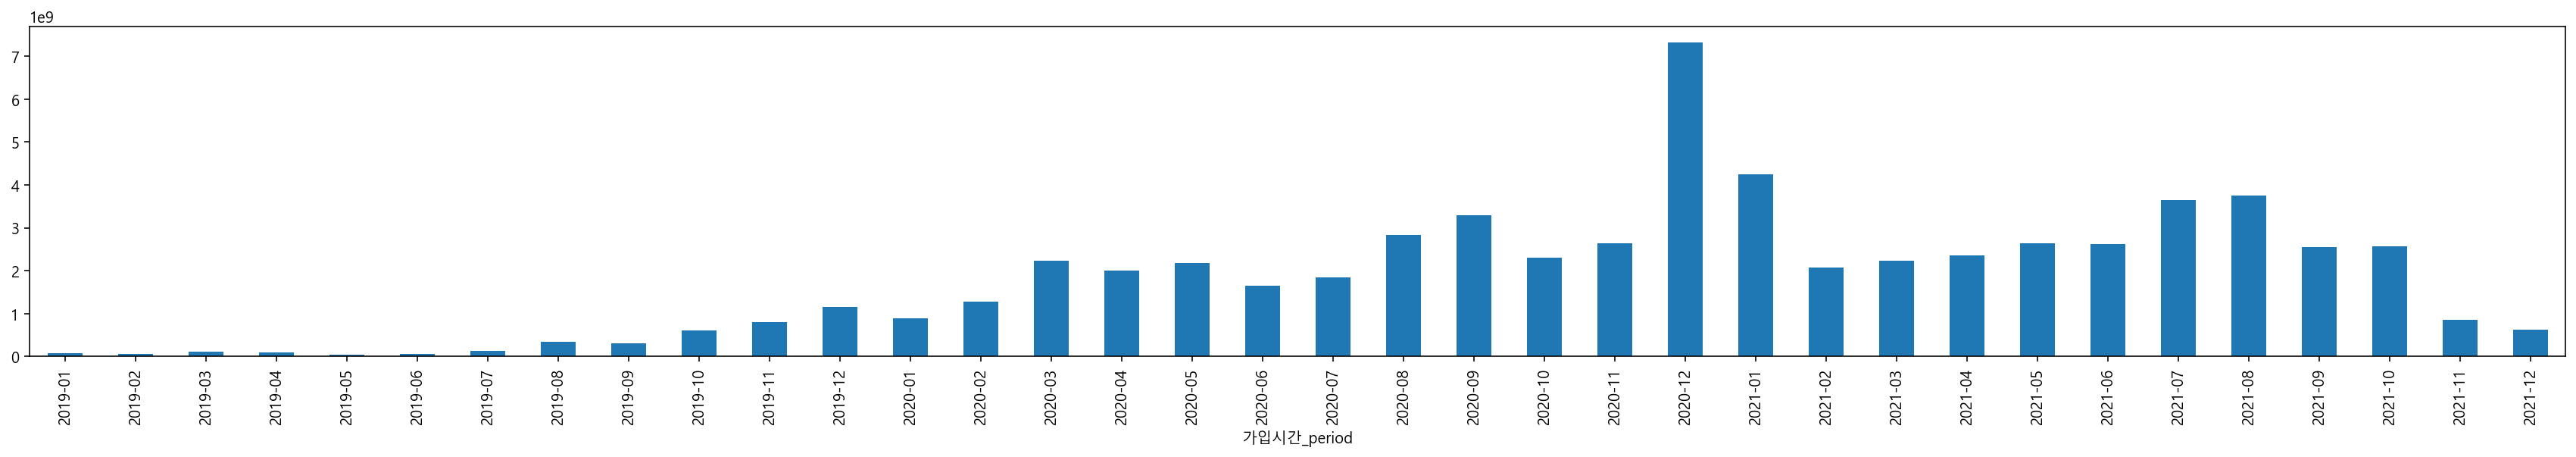

In [98]:
신규데이터 = train[train["고객정체성"] == "신규"]

np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.5f}'.format
plt.figure(figsize = [1,3])
신규데이터.groupby(["가입시간_period"])["총상품금액"].sum().plot(kind = "bar", stacked = "True", figsize = [30,4])

#### 2. 그 달 가입을 하고 / 그 달 결제를 한 고객 매출 비중 파악

 - 년도가 같아야하고, 동시에 월도 같은 고객이여야함
 - 위 두개를 만족시키는 사람들을 '당월고객', 이외의 사람들은 '당월미고객'으로 명칭하여 분리시킴

In [104]:
# 년도가 같아야하고, 동시에 월도 같은 고객이여야함.
신규데이터["년도차이"] = 신규데이터["year"] - 신규데이터["가입시간_year"]
신규데이터["월차이"] = 신규데이터["month"] - 신규데이터["가입시간_month"]

# 위 두개를 만족시키는 사람들을 당월고객, 이외의 사람들은 당월미고객으로 명칭하여 분리시킴
def number(data):
    if (data["년도차이"] == 0) & (data["월차이"] == 0):
        return "당월고객"
    else:
        return "당월미고객"
    
신규데이터["고객구분"] = 신규데이터.apply(number, axis =1)

In [105]:
신규데이터.head(2)

,주문번호,주문 UserID,주문시간,배송요청일,고객명,이메일,총상품금액,배송비,포인트 사용금액,쿠폰 사용금액,실결제금액,고객정체성,재구매기간(일),year,month,day_name,day,period,가입경로,가입시간,가입시간_year,가입시간_month,가입시간_day_name,가입시간_day,가입시간_period,년도차이,월차이,고객구분
0,_201907091304f377c6,1.00000,2019-07-09 13:04:05,2019-07-09,이원섭,onesup.lee@gmail.com,280800.00000,21000.00000,0,0,21000.00000,신규,NaN,2019,7,9,Tuesday,2019-07,이메일,2019-05-15 19:53:12,2019.00000,5.00000,15.00000,Wednesday,2019-05,0.00000,2.00000,당월미고객
2,_jNg0210731143354,5.00000,2021-07-31 14:33:54,2021-07-31,김경민,boco094@naver.com,381520.00000,28000.00000,0,40000,369520.00000,신규,NaN,2021,7,31,Saturday,2021-07,이메일,2019-05-31 17:17:54,2019.00000,5.00000,31.00000,Friday,2019-05,2.00000,2.00000,당월미고객


### 비교분석

- 위가 전체합 / 아래는 그달의 평균단가
- 두개를 비교분석 하기 위해서 둘다 넣었는데, 사실상 '신규고객이 일으킨 매출' = '당월고객' 이다. 


- 문제점 : 총상품금액으로 하기때문에 평균을 구할때 금액대가 높게나옴 다만, 전체적인 흐름을 봐야하는 차원으로는 유의함
- 문제점 : 가입수 데이터가 2019-07부터 있음 그래서 앞에는 시각화할때 오류가 발생함(감안해야함)

<AxesSubplot:xlabel='가입시간_period', ylabel='총상품금액'>

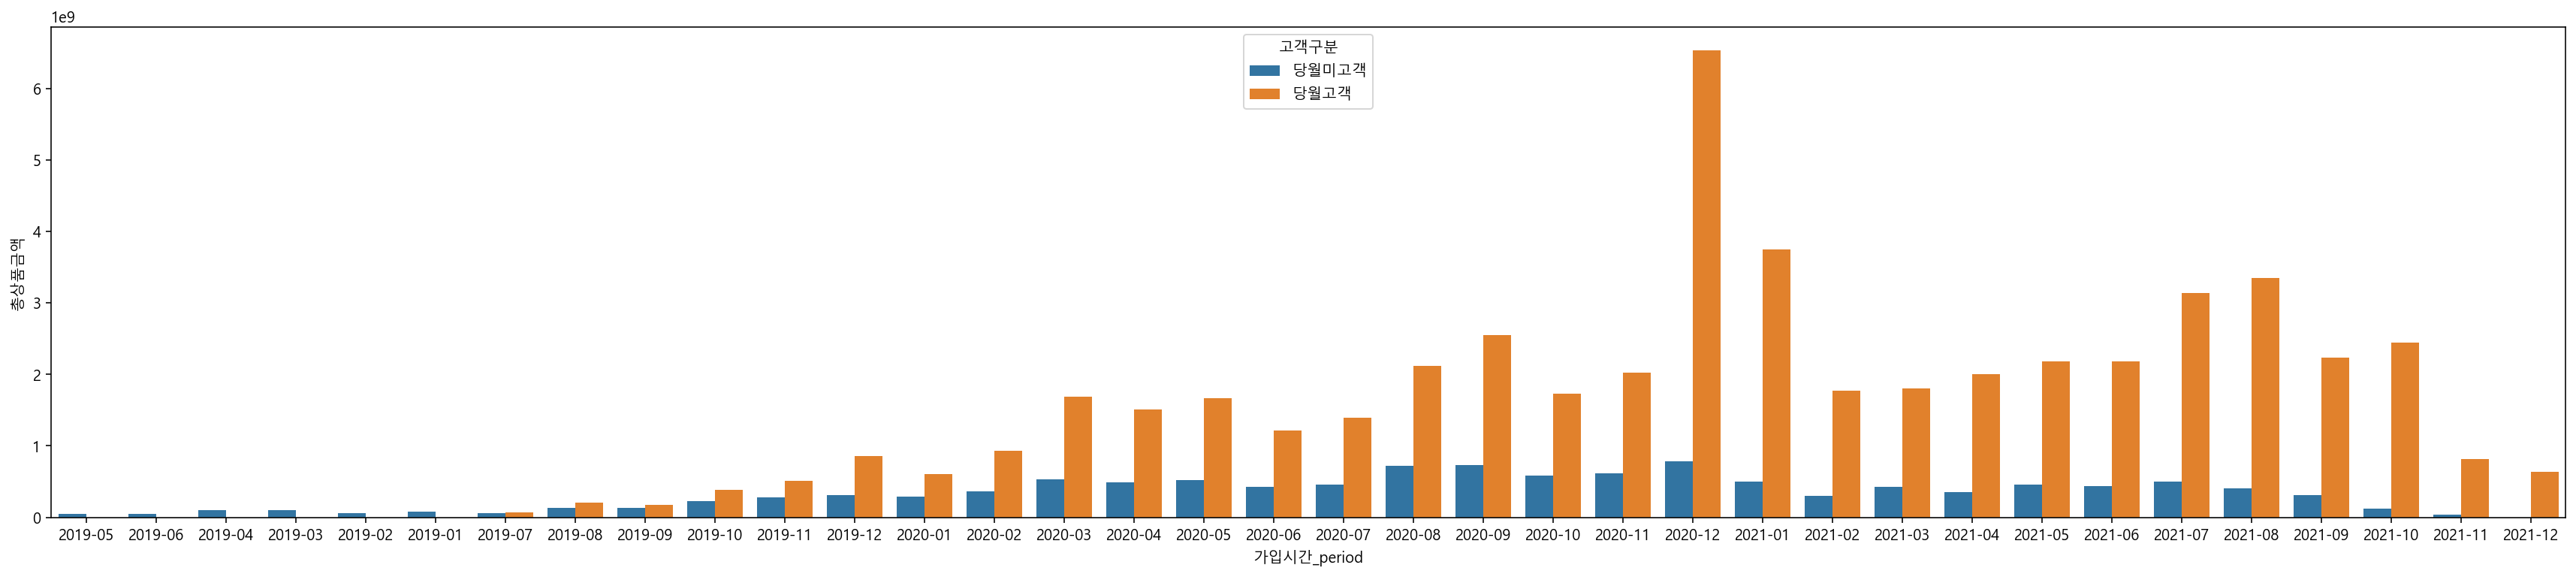

In [92]:
plt.figure(figsize = [30,6])
sns.barplot(x = "가입시간_period", y = "총상품금액", data = 신규데이터, hue = "고객구분", ci = 0, estimator = sum)

<AxesSubplot:xlabel='가입시간_period', ylabel='총상품금액'>

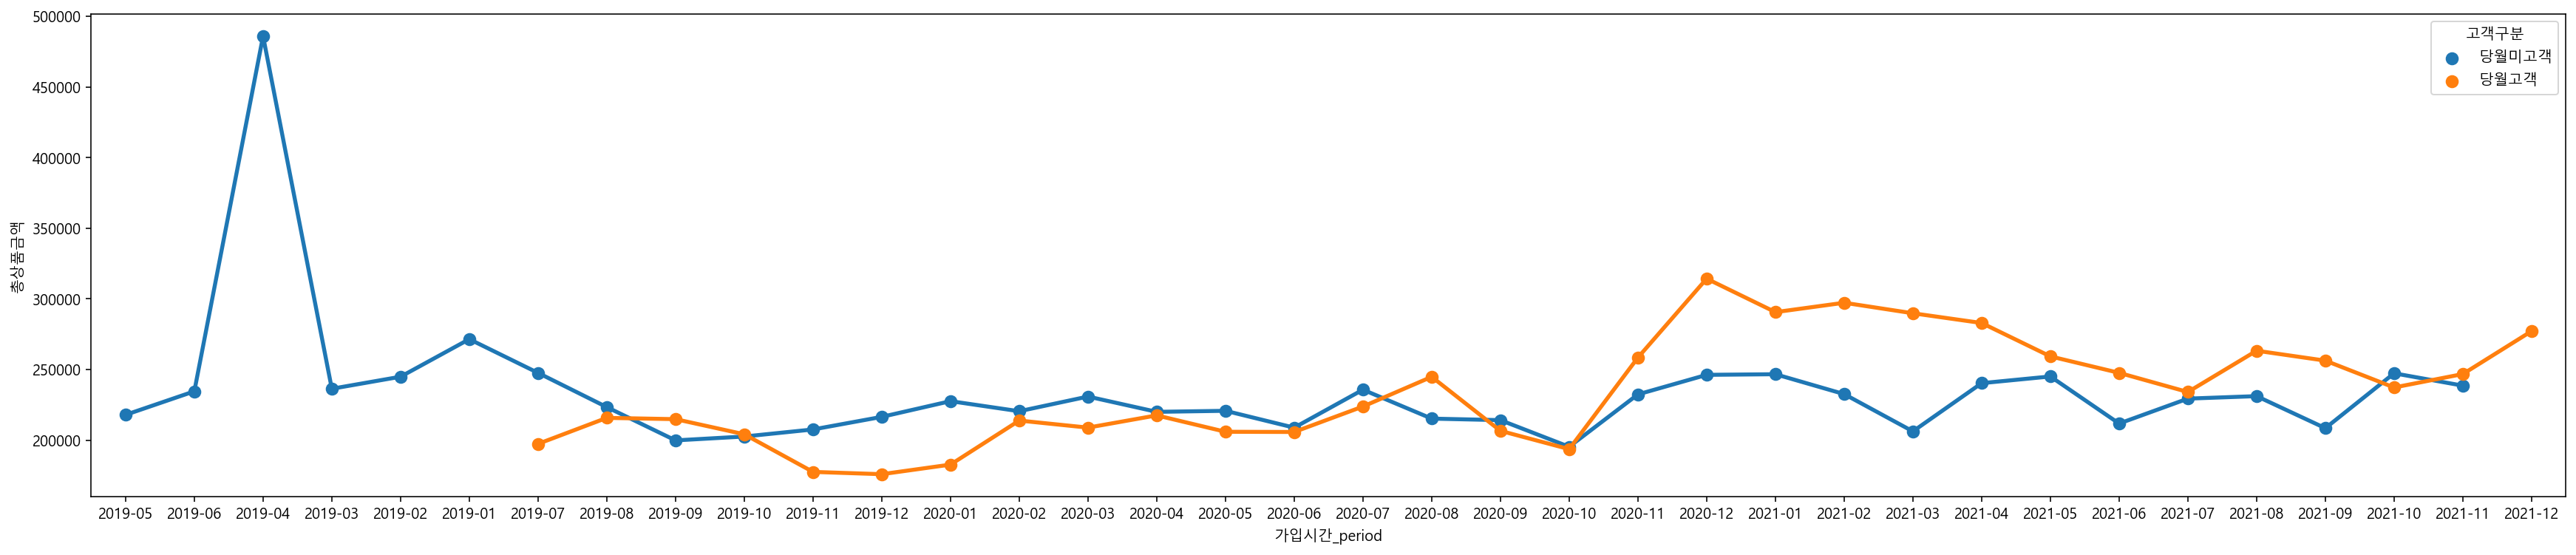

In [94]:
plt.figure(figsize = [30,6])
sns.pointplot(x = "가입시간_period", y = "총상품금액", data = 신규데이터, hue = "고객구분", ci = 0)

#### 실결제금액으로 해도 비슷하다

- 데이터를 통해서 금년 4월, 10월에, 기존에 가입만하고 구매하지 않았던 고객을 wake-up한 무언가가 있다고 생각됨

<AxesSubplot:xlabel='가입시간_period', ylabel='실결제금액'>

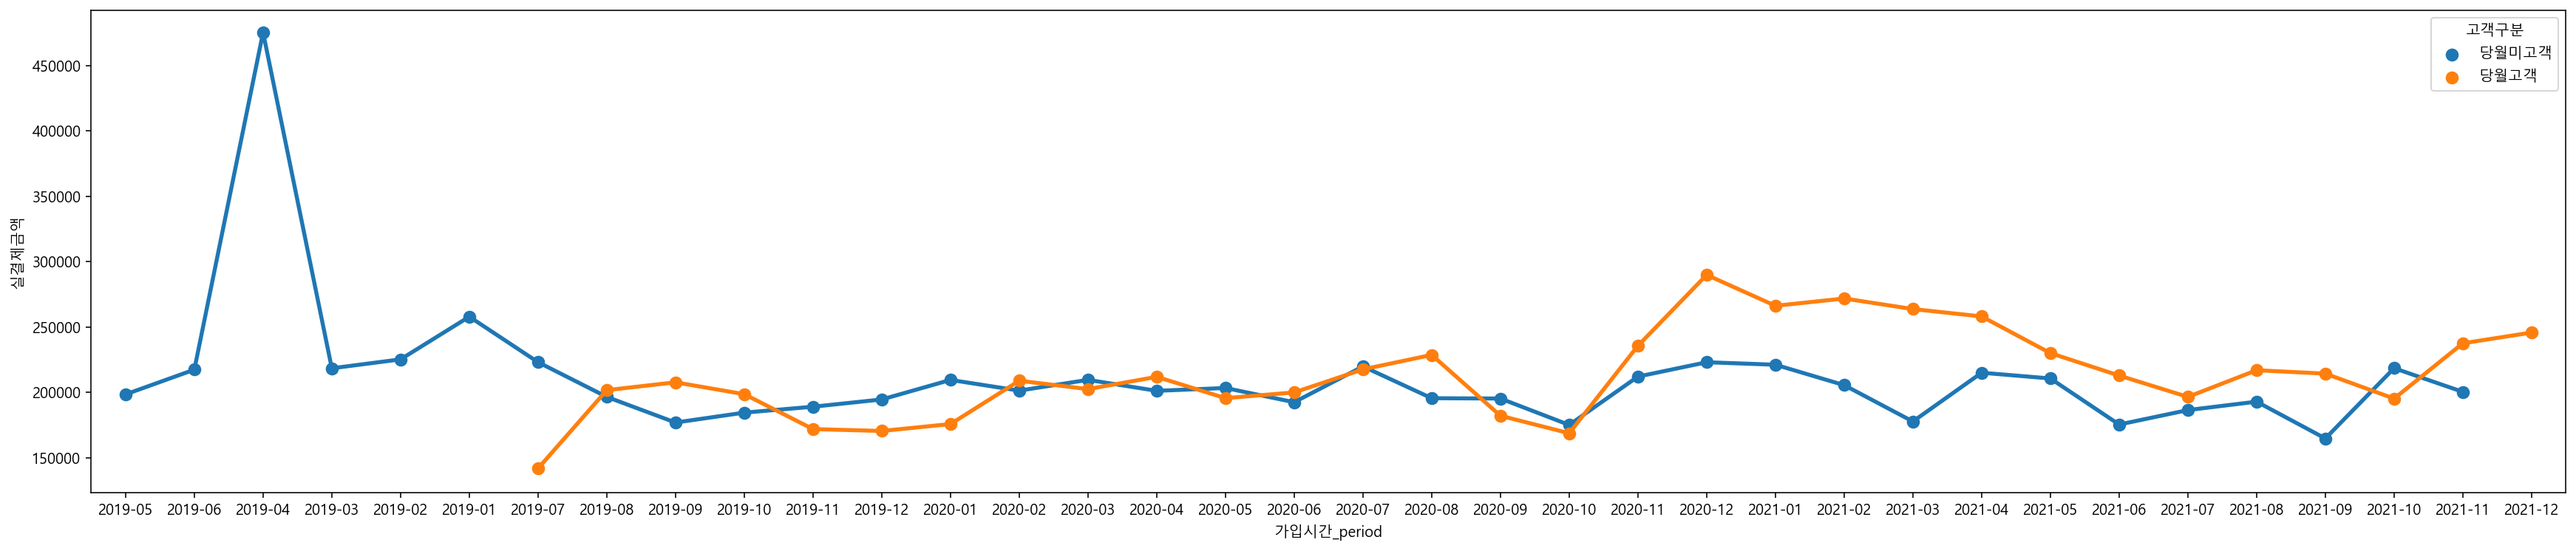

In [106]:
plt.figure(figsize = [30,6])
sns.pointplot(x = "가입시간_period", y = "실결제금액", data = 신규데이터, hue = "고객구분", ci = 0)